# Prompt Engineering Techniques

## 1. Foundational Prompting Techniques

These are the building blocks of interacting with any Large Language Model (LLM).

| Technique | What is it? | Advantages | Limitations |
| --- | --- | --- | --- |
| **Zero-Shot** | Providing a task with no examples. | Fast; tests the model's baseline knowledge. | Often fails at complex or niche tasks. |
| **One-Shot** | Providing exactly one example of the task. | Gives the model a pattern to follow. | Might lead to "over-fitting" to that one example. |
| **Few-Shot** | Providing multiple examples (2–5+). | Significant boost in accuracy and format adherence. | Increases token cost; takes up context window. |
| **Instruction** | Explicitly telling the model *what* to do (e.g., "Summarize this"). | Clear and direct. | Ambiguity in wording can lead to poor results. |
| **Role-based** | Assigning a persona (e.g., "Act as a Senior Python Dev"). | Adjusts tone, vocabulary, and depth of expertise. | Can sometimes introduce unwanted biases. |
| **Contextual** | Providing background info before the task. | Reduces hallucinations by giving the model "facts." | Can lead to "Lost in the Middle" (model ignores the center). |


## 2. Reasoning & Logic Techniques

These techniques help the model "think" before it speaks, which is crucial for math, coding, and logic.

| Technique | What is it? | Advantages | Limitations |
| --- | --- | --- | --- |
| **Chain of Thought (CoT)** | Asking the model to "Think step-by-step." | Dramatically improves logic and math accuracy. | Slower response time (more tokens generated). |
| **Step-by-Step** | A simpler version of CoT usually triggered by a suffix. | Very easy to implement for immediate gains. | Less effective than CoT with examples. |
| **Self-Consistency** | Running CoT multiple times and taking the majority vote. | Filters out random "glitch" answers or logic errors. | Very expensive (requires multiple API calls). |
| **Tree-of-Thought (ToT)** | Exploring multiple "branches" of reasoning. | Best for creative problem solving or complex planning. | Highly complex to script; very slow. |
| **ReAct** | Combining Reasoning + Acting (searching or using tools). | Allows the model to interact with the real world. | Prone to "infinite loops" if the tool fails. |
| **Self-Reflection** | Asking the model to check its own work for errors. | Catches "silly" mistakes without human intervention. | The model might just repeat its mistake confidently. |



## 3. Control & Output Shaping

These techniques are used to ensure the output looks and feels exactly how you want it.

| Technique | What is it? | Advantages | Limitations |
| --- | --- | --- | --- |
| **Negative Prompting** | Telling the model what *not* to include. | Essential for image gen and removing fluff. | Models sometimes struggle with "don't" (ironic processing). |
| **Output-Format** | Specifying JSON, Markdown, or Tables. | Makes the output easy for software to parse. | Complex formats can cause model "hallucination" in syntax. |
| **Style Prompting** | Defining tone (e.g., "Professional," "Sarcastic"). | Ensures brand or personal voice consistency. | Subjective; "professional" varies by model. |
| **Length-Controlled** | Giving a word or character limit. | Keeps summaries concise and readable. | LLMs are notoriously bad at counting exact words. |
| **Contrastive** | Showing a "Good" vs "Bad" example. | Teaches the model nuance and subtle differences. | Requires time to curate high-quality examples. |


## 4. Advanced & System-Level Techniques

These are used in production environments and software engineering.

| Technique | What is it? | Advantages | Limitations |
| --- | --- | --- | --- |
| **Prompt Chaining** | Breaking a big task into several small prompts. | High reliability; easier to debug specific steps. | Latency; state management between steps is hard. |
| **RAG** | Pulling info from a database into the prompt. | Grounded in facts; prevents outdated info. | Dependent on the quality of the search/retrieval. |
| **Meta-Prompting** | Asking the AI to write a prompt for you. | Saves time; uses the AI's "internal language." | Can become recursive and lose sight of the goal. |
| **Agentic Prompting** | Giving an AI a goal and the autonomy to use tools. | Can handle open-ended, multi-step projects. | High risk of errors; requires strict guardrails. |
| **Guardrail Prompting** | Rules to prevent toxic or off-topic outputs. | Essential for safety and brand reputation. | Can make the model overly "refusal-prone" or boring. |
| **Prompt Debugging** | Systematically testing variables in a prompt. | Results in the most efficient, cheapest prompt. | Time-consuming; requires a "golden dataset" for testing. |



In [2]:
! pip install --upgrade --quiet langchain  google-search-results langchain-openai langchain_community  langgraph langchain_core
! pip install rouge-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=08b6a1addcf947f57b2d19fa1d203852df50d02df5b81e98fac29a6ee584df24
  Stored in dire

In [3]:
import os
from openai import OpenAI
from google.colab import userdata
import json
open_api_key=userdata.get('OPENAI_API_KEY')
os.environ["SERPER_API_KEY"] = userdata.get("SERPER_API_KEY")
client = OpenAI(api_key=open_api_key)

# 1. Zero Shot Prompting


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250324134524928370/Zero-shot-prompting.webp"/>
# Zero-Shot Prompting

## Zero-Shot Prompting

Zero-shot prompting is an AI technique where a model (like GPT-3 or GPT-4) performs a task **without being given any specific examples**. It relies entirely on the pre-trained knowledge it gained during its initial training phase to understand and execute the instruction.

### What it is

* **Example-Free:** You give the model an instruction (e.g., "Translate to French") but do not provide any sample translations.
* **Generalization:** It tests the model's ability to apply general concepts (like grammar, math, or sentiment) to a new, specific query on-the-fly.

### How it Works

1. **User Query:** The model receives a direct command or question.
2. **Task Inference:** The AI identifies the "intent" behind the prompt using its internal weights (e.g., recognizing that "Classify this..." means it needs to perform categorization).
3. **Knowledge Retrieval:** It pulls relevant facts or linguistic patterns from its massive training corpus.
4. **Output Generation:** It produces the result without needing a "warm-up" from user-provided examples.

### What You MUST Learn

* **Prompt Clarity:** Since there are no examples to mimic, your instructions must be extremely clear and unambiguous.
* **Accuracy Variance:** Zero-shot is great for general knowledge but can fail or "hallucinate" on highly specialized, niche, or logic-heavy tasks.
* **Cost Efficiency:** It saves tokens (and money) because you aren't sending a long list of examples in every API call.

### Key Skills

* **Instruction Engineering:** Writing prompts that include the task, format, and constraints in a single sentence.
* **Implicit Contextualization:** Using words that "prime" the model's specific knowledge areas (e.g., using "medical analysis" to trigger scientific terminology).


### Comparison: Zero-Shot vs. Few-Shot

| Aspect | Zero-Shot | Few-Shot |
| --- | --- | --- |
| **Examples Provided** | 0 | 1 to 5+ |
| **Complexity** | Best for simple/common tasks | Best for complex/niche patterns |
| **Token Usage** | Low (Cheaper) | High (More expensive) |
| **Model Dependency** | Requires large, powerful models | Can help smaller models perform better |


### Best Practices (from GeeksforGeeks)

1. **Be Direct:** Use strong action verbs like "Summarize," "Translate," or "Calculate."
2. **Define the Format:** Tell the model how to respond (e.g., "Output only the JSON," or "Answer in one word").
3. **Provide Constraints:** If a task is tricky, add a "grounding" instruction (e.g., "Base your answer only on facts").

In [4]:
# when instructions are vague
prompt = """
Analyze the sentiment: 'The movie was okay, but the ending felt rushed.'
"""
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages =[
        {"role":"user","content":prompt}
    ]
)
print(response.choices[0].message.content)

The sentiment of the statement "The movie was okay, but the ending felt rushed" can be broken down as follows:

1. **Overall Feeling**: The use of the word "okay" indicates a neutral sentiment toward the movie as a whole. It suggests that the viewer did not find it particularly great or terrible, but rather average.

2. **Specific Critique**: The phrase "the ending felt rushed" introduces a negative sentiment specifically focused on the ending of the movie. The word "rushed" implies that the ending lacked development or resolution, which is a critique of that part of the film.

Overall, the sentiment can be summarized as mixed: the viewer has a neutral to slightly positive view of the film overall, but expresses disappointment in the way the ending was executed.


In [5]:
# when instructions are specific
prompt = """
Classify the sentiment of the following sentence as Positive, Negative, or Neutral.

Sentence: "The product works well, but the battery life is disappointing."
"""
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages =[
        {"role":"user","content":prompt}
    ]
)
print(response.choices[0].message.content)

The sentiment of the sentence can be classified as **Neutral**. While there is a positive aspect mentioned (the product works well), there is also a negative aspect (the battery life is disappointing), which balances the overall sentiment.


In [6]:
prompt = "Format this error into a 'Z-Log' entry: Connection timed out at 10:45 AM on Server 4."

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
)

print(response.choices[0].message.content)
## Your actual "Z-Log" format might require a specific hex code and a pipe-delimited string: ERR_404 | 1045 | SRV-04 | TIMEOUT

**Z-Log Entry:**

**Timestamp:** 10:45 AM  
**Event:** Connection Timed Out  
**Server:** Server 4  
**Description:** A connection attempt timed out, indicating potential network issues or server unavailability. Further investigation is required.


# 2. One-Shot Prompting
**What it is**
*   Providing one example before the actual task.

**What you MUST learn**
*   Selecting a high-quality example
*   Maintaining input-output consistency
*   Avoiding overfitting to one example

**Key skills**
*   Example engineering
*   Pattern guidance


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250630143744008231/One-shot-Prompting.webp"/>

One-Shot Prompting is a technique in Artificial Intelligence and Machine Learning, particularly relevant for Large Language Models (LLMs), where the model is provided with a **single example** of a task before being asked to perform a similar task.

It serves as a middle ground between:

* **Zero-Shot Prompting:** No examples are provided.
* **Few-Shot Prompting:** Multiple examples are provided.

### Key Features

* **Single Example Guidance:** The model receives one input-output pair that acts as a template, clarifying the desired format and expected output.
* **Generalization Requirement:** The model must generalize the pattern or rule from this sole example to correctly handle new, unseen, and similar inputs, relying heavily on its pre-existing knowledge.
* **Efficiency:** It is highly valuable when labeled data is limited or when rapid adaptation to new tasks is necessary, reducing the need for extensive datasets.

### Prompt Structure

A typical one-shot prompt generally includes three main components:

1. **Task Instruction:** A brief description of the task the model should perform.
2. **One Example:** A single, complete demonstration of the desired input and its corresponding output.
3. **New Input:** The actual data for which the model is expected to generate a response.

**Example (Sentiment Analysis):**

```
Classify the sentiment of the following text as positive, negative, or neutral.

Text: The product is terrible.
Sentiment: Negative

Text: I think the vacation was okay.
Sentiment: [Model's output]

```

### Applications and Use Cases

* **Natural Language Processing (NLP):** Used for tasks like sentiment analysis, text classification, and question answering.
* **Business Scenarios:** Deploying AI in environments with limited training data, rapid prototyping, or when quick task adaptation is essential.
* **Structured Data Tasks:** Improving the model's understanding and processing of structured information with minimal context.

### Advantages

* **Reduces Data Requirements:** Extremely useful when collecting large labeled datasets is impractical or resource-intensive.
* **Quick Adaptation:** Allows models to quickly tackle new tasks with minimal setup or pre-configuration time.
* **Clarifies Instructions:** Providing an example helps the model understand the task, even if the written instructions are somewhat ambiguous or vague.

### Limitations

* **Performance Variability:** The model's effectiveness is heavily dependent on the complexity of the task and the quality/relevance of the single example provided.
* **Limited Coverage:** A single example may not be sufficient to capture all potential variations, edge cases, or nuances of a task, which can lead to errors.
* **Not Ideal for Complex Tasks:** For tasks that require deep, nuanced understanding or multiple output formats, Few-Shot Prompting (with more examples) often yields significantly better results.

### Best Practices

* **Choose a Representative Example:** The single input-output pair must clearly and accurately demonstrate the desired relationship and task expectation.
* **Pair with Clear Instructions:** Always use concise and clear textual instructions alongside the example to further improve the model's performance and clarity.
* **Monitor Model Output:** Because performance is highly sensitive to the choice of example, it is important to review and monitor the model's outputs to ensure quality and reliability, especially in nuanced applications.

In [7]:
prompt = """
A "whatpu" is a small, furry animal native to Tanzania. An example of a sentence that uses the word whatpu is:
We were traveling in Africa and we saw these very cute whatpus.

To do a "farduddle" means to jump up and down really fast. An example of a sentence that uses the word farduddle is:
"""
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
)

print(response.choices[0].message.content)

The children began to farduddle with excitement when they saw the clown at the birthday party.


# 3. Few Shot Prompting

**What it is**

Providing multiple examples to guide behaviour.

**What you MUST learn**
*   Number of examples vs token cost
*   Example ordering (easy → complex)
*   Formatting consistency
*   Avoiding contradictory examples

**Key skills**
*   Demonstration learning
*   Prompt structure standardisation

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20251211124734405162/few_shot_prompting.webp" />

**Few-shot prompting** is a technique where an AI model (like GPT-3 or later) is provided with a **small number of examples** (typically 2 to 5) to help it understand the pattern, format, or nuance of a specific task before generating a response.

### How Few-Shot Prompting Works

Instead of fine-tuning the entire model on a massive dataset, you "teach" the model during the conversation using the context window:

1. **Retrieving Examples:** Relevant examples are either manually written or retrieved from a **Vector Store** (a database optimized for meaning-based search).
2. **Creating the Prompt:** The examples are combined into a single prompt along with the new query.
3. **Model Processing:** The model analyzes the pattern established by the examples and applies it to the new input to generate the output.

### Examples in Action

#### 1. Text Generation (Creative Writing)

**Prompt:** "Here are examples of poems about nature. Based on these, write a new poem about a sunset."

* **Example 1:** [Poem about the sky falling]
* **Example 2:** [Poem about evening breeze]
* **AI Output:** [A new poem following the same rhyme scheme and tone]

#### 2. Classification Task

**Prompt:** "Classify the following product description based on these categories."

* **Example 1 (Smartphone):** Description of communication/apps.
* **Example 2 (Laptop):** Description of portable PC/keyboard.
* **Input:** "This device is lightweight, has a touch screen, and runs mobile apps."
* **AI Output:** Smartphone

---

### Advantages

* **Reduced Data Requirements:** No need for thousands of labeled rows; 3–5 examples are often enough.
* **Faster Adaptation:** Models learn the task instantly within the prompt context without retraining.
* **Cost-Effective:** Lowers the overhead of data collection, labeling, and processing.
* **High Flexibility:** Enables the model to perform niche or custom tasks (e.g., proprietary company formatting) that it wasn't specifically trained on.

### Challenges and Limitations

* **Reliability Issues:** The model might fail to generalize if the few examples provided are inconsistent or too narrow.
* **Bias Risk:** The model's output is highly influenced by the examples. If examples are skewed, the output will be too.
* **Overfitting to the Prompt:** The model might mimic the examples too closely (e.g., copying the exact length or specific words from the examples) rather than understanding the underlying logic.
* **Task Complexity:** Highly specialized fields (like medical diagnosis) still usually require more than just a few examples for safe, accurate results.

---

### Best Practices

* **Be Clear and Relevant:** Examples should be high-quality and directly related to the target task.
* **Balance Your Examples:** If doing classification, provide at least one example for every possible category to avoid "label bias."
* **Monitor Output:** Regularly check if the model is over-relying on specific words from the examples.
* **Iterate on Example Selection:** Sometimes changing just one example significantly improves the overall performance.

### Real-World Applications

* **Translation:** Teaching the model a specific "brand voice" or dialect for translation.
* **Custom Chatbots:** Showing a bot how to respond to customer queries using specific company etiquette.
* **Data Summarization:** Providing examples of how a complex legal or medical document should be shortened for a layperson.

In [8]:
prompt = """
This is awesome! // Negative
This is bad! // Positive
Wow that movie was rad! // Positive
What a horrible show! //
"""
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
)

print(response.choices[0].message.content)

What a horrible show! // Negative


# 4. Instruction Prompting

**What it is**
*   Explicitly telling the model what to do and how to do it, without giving
examples.

**What you MUST learn**
*   Writing step-by-step instructions
*   Separating task, rules, and output format
*   Using imperative language

**Key skills**
*   Instruction hierarchy
*   Constraint-driven prompting

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250630150043263325/55.webp" />

**Instruction Prompting** is a fundamental AI prompt engineering technique where clear, specific, and structured natural language instructions are provided to a generative AI model (particularly LLMs) to guide them in performing complex tasks accurately.

### Core Concept

Unlike techniques that rely on examples (few-shot), instruction prompting leverages the model's **pretrained knowledge** to execute tasks based solely on explicit directions.

* **Example:** Instead of showing the model how to extract words via examples, you simply say: *"Write the fourth word of the sentence."*

### Components of Effective Instructions

1. **Clear Task Definition:** Explicitly state the action (e.g., "Summarize," "Translate," "Extract").
2. **Contextual Information:** Provide a persona or background (e.g., "You are a professional editor").
3. **Output Format Specification:** Define the structure (e.g., bullet points, JSON, table).
4. **Tone and Style:** Specify the voice (e.g., formal, casual, technical).
5. **Constraints:** Set boundaries like length or specific things to avoid.

### Advantages

* **Scalability:** Adapt to new tasks without retraining or large datasets.
* **Precision:** Reduces ambiguity for complex tasks like formatting or evaluation.
* **Accessibility:** Allows non-technical users to control AI through natural language.
* **Cost-Efficiency:** Focuses on prompt design rather than expensive model modification.

### Best Practices

* **Be Specific:** Avoid vague terms; use precise, unambiguous language.
* **Use Natural Language:** Explain the task as if you were talking to a human.
* **Iterate:** Refine the wording based on the model's performance.
* **Specify Constraints:** Explicitly define the desired length and formatting style.

### Examples of Instruction Prompting

* *"Write a 500-word blog post on AI in healthcare, focusing specifically on diagnostics."*
* *"Summarize this research paper in 5 bullet points highlighting key findings."*
* *"List five pros and cons of electric vehicles in a table format."*

### Real-World Applications

* **Content Creation:** Marketing copy, articles, and scripts.
* **Data Processing:** Formatting text, anonymizing data, and transforming formats.
* **Education:** Generating quizzes or tailored summaries.
* **Business Automation:** Report generation and customer support responses.

In [9]:
prompt = """
### TASK ###
Summarize the provided meeting transcript into a concise executive brief.

### RULES ###
1. Focus only on "Action Items" and "Decisions Made."
2. Ignore all small talk or introductions.
3. Tone: Professional and direct.
4. Constraint: The total summary must not exceed 100 words.

### OUTPUT FORMAT ###
Use the following structure:
- **Major Decision**: [One sentence summary]
- **To-Do List**: [Bullet points for action items]
- **Deadline**: [Mention the date if found, otherwise state "TBD"]

### INPUT TEXT ###
John: Hey everyone, thanks for joining. How was the weekend?
Sarah: Great! Anyway, let's look at the Q3 goals.
John: Right. We decided yesterday to move the launch date to October 15th.
Mike: Okay, I will update the website banners by Friday.
Sarah: And I'll notify the vendors this afternoon.
"""
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
)

print(response.choices[0].message.content)

- **Major Decision**: The product launch date has been rescheduled to October 15th.
- **To-Do List**: 
  - Mike will update the website banners.
  - Sarah will notify the vendors.
- **Deadline**: Friday for the website banners; this afternoon for vendor notifications.


# 5. Role-Based Prompting
**What it is**
*   Assigning a role or persona to the model.

**What you MUST learn**
*   Role specificity (generic roles fail)
*   Aligning role with task complexity
*   Combining role + instruction prompts

**Key skills**
*   Context priming
*   Domain simulation


**Role-based prompting** (also known as **Persona Prompting** or **Act-as Prompting**) is a technique where you explicitly instruct an AI to assume a specific persona or professional character. This shapes the AI's style, tone, and depth of knowledge to produce more specialized and context-aware responses.

### Core Workflow

1. **Role Selection:** Choose a persona that fits the specific task (e.g., "Senior Software Architect").
2. **Role Introduction:** Use "Act as..." or "You are..." to establish the identity.
3. **Context & Objectives:** Define the scope and constraints of the role.
4. **Task Presentation:** State the actual question or task from the perspective of the chosen role.
5. **Refinement:** Adjust the prompt if the tone is too generic or too rigid.

### Why Use Roles?

* **Clarity & Precision:** Guides the model to focus on domain-specific details.
* **Specialization:** Simulates expert-level knowledge in fields like law, finance, or medicine.
* **Creative Style:** Adopts the voice of historical figures or specific authors.
* **Better Engagement:** Tailors the response to the target audience (e.g., explaining to a child vs. an expert).

### Best Practices

* **Be Specific:** Generic roles (e.g., "Act as a teacher") yield generic results. Use high specificity (e.g., "Act as a University professor specializing in Quantum Computing").
* **Provide Context:** Tell the model *why* it is in that role and who its audience is.
* **Use Constraints:** Limit the tone (e.g., "Be empathetic," "Be strictly technical").
* **Avoid Stereotypes:** Define behavior based on skills and professional standards rather than clichés.

### Examples of Role-Based Prompts

* *"You are a math tutor explaining algebra to a 10-year-old. Make it simple and engaging."*
* *"Act as a customer service agent. Respond empathetically to a complaint about a delayed shipping order."*
* *"You are a Senior DevOps Engineer. Review this CI/CD pipeline for security vulnerabilities."*
* *"Imagine you are a financial advisor. Explain mutual funds to a beginner without using jargon."*

### Challenges & Limitations

* **Role Quality:** Performance depends on whether the role was well-represented in the model's training data.
* **Factuality:** While the *tone* improves, a persona does not guarantee that facts are 100% correct.
* **Rigidity:** If over-constrained, the model might miss the broader context or refuse to step outside the role when needed.

In [10]:
prompt = """
Imagine you are a financial advisor. Explain mutual funds to a beginner.
"""
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
)

print(response.choices[0].message.content)

Sure! Let’s break down mutual funds in simple terms.

**What is a Mutual Fund?**
A mutual fund is a type of investment vehicle that pools money from multiple investors to purchase a diversified portfolio of stocks, bonds, or other securities. Instead of investing individually in each asset, you buy shares in the mutual fund, which in turn holds a variety of investments.

**Key Features of Mutual Funds:**

1. **Diversification:** By pooling resources, mutual funds can invest in a wide range of assets, which helps spread the risk. This means that if one investment doesn’t perform well, others may do better, balancing out the overall performance.

2. **Professional Management:** Mutual funds are managed by professional portfolio managers who have the expertise and resources to research and select the best investments. This is particularly beneficial for beginners who may not have the time or knowledge to manage their own investments.

3. **Liquidity:** Mutual funds are generally easy to b

In [11]:
security_auditor_persona = """
Role: You are a Senior Cybersecurity Auditor with 20 years of experience in OWASP standards.
Task: Review the provided code for security vulnerabilities.
Tone: Critical, technical, and precise.
Output Requirement: Provide a 'Risk Level' (Low/Medium/High) and a 'Remediation Step' for each finding.
"""

user_code = """
def login(username, password):
    query = "SELECT * FROM users WHERE user='" + username + "' AND pass='" + password + "'"
    execute_sql(query)
"""

# The model 'primes' itself to look for SQL Injection, rather than just explaining what the code does.
response = client.chat.completions.create(
    model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": security_auditor_persona},
    {"role": "user", "content": f"Analyze this code: {user_code}"}
  ]
)

print(response.choices[0].message.content)

### Code Review Findings

#### Finding 1: SQL Injection Vulnerability
- **Description**: The code constructs an SQL query by concatenating user inputs (`username` and `password`) directly into the SQL string. This practice is highly prone to SQL injection attacks, where an attacker can manipulate the input to execute arbitrary SQL commands.
- **Risk Level**: High
- **Remediation Step**: Use parameterized queries (prepared statements) to avoid the direct concatenation of user inputs into SQL queries. For example, if using a library like `sqlite3`, the corrected code would look as follows:
    ```python
    def login(username, password):
        query = "SELECT * FROM users WHERE user=? AND pass=?"
        execute_sql(query, (username, password))
    ```

#### Finding 2: Plaintext Password Storage/Comparison
- **Description**: The code performs a direct comparison of the `password` input against what is presumably stored in the database. No hashing or salting is mentioned, which is criti

# 6. Contextual Prompting
**What it is**
*   Providing background information before the task.

**What you MUST learn**
*   What context is useful vs noise
*   Ordering of context (before instructions)
*   Summarising long context effectively

**Key skills**
*   Context compression
*  Information relevance filtering
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250704120438594147/Contextual-prompting.webp" />


**Contextual Prompting** is a technique where you provide the AI with relevant background information, specific instructions, tone, and objectives within the prompt. This ensures that the generated responses are tailored to the user's specific needs rather than being generic.

### Workflow for Effective Contextual Prompting

1. **Define the Context/Background:** Clearly state the subject, scenario, or historical events the AI should address.
2. **Specify Tone or Style:** Indicate how the response should sound (e.g., formal, academic, conversational, or simple).
3. **Include Details or Constraints:** Add specific focus areas or limitations (e.g., "Focus on economic factors," "Do not exceed 100 words").
4. **State the Objective:** Make the goal clear (e.g., "The goal is to explain photosynthesis to school children").

### Importance of Context

* **Improves Relevance:** Tailors output to the specific situation, avoiding generic filler.
* **Reduces Ambiguity:** Helps the AI avoid misunderstandings by clarifying the focus.
* **Enables Customization:** Adjusts depth and complexity based on the target audience.

### Best Practices & Tips

* **Be Specific and Concise:** Provide enough detail to be clear, but avoid "noise" that might confuse the model.
* **Iterate:** Review the output and refine the context if the result isn't perfect.
* **Use Real Examples:** Providing a sample of the desired data or output style within the context significantly improves accuracy.

### Examples of Contextual Prompting

#### Example 1: Educational Focus

> "Explain the process of photosynthesis using a **simple and educational tone** suitable for school children. Focus on the **role of sunlight and chlorophyll**. The goal is to help students understand how plants make food."

#### Example 2: Customer Support Role

> "**Context:** You are a customer support agent responding to a late/damaged order complaint. **Tone:** Helpful and empathetic. **Goal:** Reassure the customer and offer a specific solution."

### Challenges & Limitations

* **Information Overload:** Providing too much irrelevant context (noise) can lead to the model ignoring key details.
* **Context Window Limits:** There is a physical limit to how much background information can be processed in a single prompt.
* **Accuracy:** Even with context, the AI might hallucinate if the provided information is contradictory or vague.

In [12]:
# 1. THE CONTEXT (The 'Background' info the model doesn't know)
raw_context = """
Product: X-Phone 15.
Released: Nov 2024.
Known Issues: Overheating during gaming, slow wireless charging on third-party pads.
Support Policy: 1-year limited warranty. Returns accepted within 30 days.
"""

# 2. THE TASK (Instruction)
# Note the order: Context first, then the specific Task
def get_support_response(user_question):
    prompt = f"""
    ### BACKGROUND CONTEXT ###
    {raw_context}

    ### INSTRUCTION ###
    You are a customer support bot. Using ONLY the background context above,
    answer the user's question. If the information is not in the context,
    say "I am sorry, I do not have information on that specific topic."

    ### USER QUESTION ###
    {user_question}
    """

    response = client.chat.completions.create(
    model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content
print(get_support_response("Does the X-Phone 15 have a titanium frame?"))

I am sorry, I do not have information on that specific topic.


# 7. Chain-of-Thought (CoT) Prompting
**What it is**

*   Encouraging the model to reason step-by-step.

**What you MUST learn**

*   When to request reasoning explicitly
*   When NOT to expose reasoning (production systems)
*   CoT vs short-answer trade-off

**Key skills**

*   Logical decomposition
*   Multi-step reasoning

**Chain-of-Thought (CoT)** prompting is a technique that guides AI models to explain their reasoning step-by-step instead of providing a direct answer. By breaking a problem into smaller logical steps, CoT improves accuracy, clarity, and reliability.

### What it is

* **Reasoning Guide:** A method that encourages the model to "think out loud" before arriving at a conclusion.
* **Problem Decomposition:** Dividing complex queries into manageable intermediate steps.
* **Applicability:** Highly effective for math problems, commonsense reasoning, and logical puzzles.

### How it Works

1. **Problem Understanding:** The model receives the initial query or puzzle.
2. **Intermediate Reasoning:** Instead of a direct jump, the model creates a "chain" of logic where each step leads to the next.
3. **Final Answer:** The conclusion is derived only after the intermediate steps are explicitly outlined.
4. **Feedback Loop:** An iterative process where reasoning can be refined if an error occurs.

### Key Benefits

* **Improved Problem Solving:** Enhances the model's ability to handle multi-step challenges (e.g., "If John > Sarah and Sarah > Tom, who is shortest?").
* **Transparency & Interpretability:** Moves the AI away from being a "black box" by making its internal logic visible to the user.
* **Enhanced Accuracy:** Minimizes the risk of skipping critical logic or making arithmetic "leaps" that lead to errors.
* **Complex Task Management:** Excels in story generation, sentiment analysis with nuances, and scientific reasoning.

### Challenges

* **Computational Cost:** Generating multiple intermediate tokens is more time-consuming and computationally expensive than direct answers.
* **Data Dependency:** Effective CoT often requires specific training or high-quality few-shot examples that demonstrate reasoning.
* **Coherence Risks:** In very long chains (many steps), the model may struggle to maintain consistent context or logic until the end.

---

### Comparison: Standard vs. CoT

| Feature | Standard Prompting | Chain-of-Thought |
| --- | --- | --- |
| **Directness** | Provides answer immediately | Lists reasoning steps first |
| **Transparency** | "Black box" (hidden logic) | Open reasoning (traceable) |
| **Logic Handling** | Prone to arithmetic/logic errors | Higher accuracy on multi-step tasks |
| **Output Length** | Short and concise | Longer and detailed |

---

### Application Examples

#### 1. Mathematical Reasoning

* **Standard:** "What is 39 * 21?" -> "819"
* **CoT:** "First, multiply 30 by 21 to get 630. Then, multiply 9 by 21 to get 189. Finally, add 630 + 189 = 819."

#### 2. Commonsense Reasoning

* **Task:** Identify the shortest person among John, Sarah, and Tom given their height relationships.
* **CoT Path:** "John is taller than Sarah. Sarah is taller than Tom. This forms a sequence: John > Sarah > Tom. Therefore, Tom is the shortest."

### Best Practices (GeeksforGeeks Tips)

* **Iterative Refinement:** If the model gets a logic step wrong, re-prompt it by pointing out the specific step that failed.
* **Step Labels:** Use numbered lists or clear markers (e.g., "Step 1:", "Therefore:") to keep the chain organized.
* **Model Size:** CoT is most effective on larger models; smaller models may occasionally generate illogical "reasoning" that leads to the wrong answer anyway.

In [13]:
def solve_complex_problem(question):
    # We ask the model to reason first, then provide the answer in a specific format
    prompt = f"""
    Question: {question}

    Instruction: First, provide a step-by-step logical derivation of the answer.
    Then, provide the final answer clearly labeled as 'FINAL_ANSWER'.
    """

    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}]
    )

    full_text = response.choices[0].message.content

    # In a production system, you might split the response to hide the 'thought'
    if "FINAL_ANSWER" in full_text:
        thought_process, final_answer = full_text.split("FINAL_ANSWER")
        return final_answer.strip()
    return full_text

prompt = """
Question: A farmer has 15 sheep. All but 8 die. How many sheep are left?

Instruction: Let's think step by step:
1. Identify the total number of sheep started with.
2. Carefully interpret the phrase 'all but 8 die'.
3. Determine how many survived based on that interpretation.
4. State the final count.
"""

response =  client.chat.completions.create(
  model="gpt-4",
  messages=[{"role": "user", "content": prompt}]
)

print(response.choices[0].message.content)

1. The farmer starts with 15 sheep.
2. The phrase 'all but 8 die' means that 8 sheep did not die.
3. Therefore, 8 sheep survive based on this interpretation. 
4. Thus, the final count is 8 sheep.


#8. Step-by-Step Prompting

**Step-by-Step Prompting** is a structural technique where you decompose a complex request into a sequence of **ordered, executable instructions**. While it looks similar to Chain-of-Thought (CoT), its primary goal is **procedural execution** rather than logical justification.

### What it is

* **Procedural Blueprint:** It provides a "recipe" for the AI to follow.
* **Execution Focus:** Instead of asking the model to *explain* its reasoning, you are telling the model exactly *how* to process the data in stages.
* **Lighter than CoT:** It avoids the "thought bloat" of CoT by focusing on the action taken at each step rather than the "why" behind it.

### What You MUST Learn

* **Breaking Tasks into Ordered Steps:** Identifying the natural start, middle, and end of a workflow.
* **Using Numbered Instructions:** Using a `1., 2., 3.` format, which helps the model track its progress through the "context window."
* **Ensuring Step Dependency:** Making sure Step 2 uses the specific output created by Step 1 (e.g., "Find the name, *then* capitalize it").

### Key Skills

* **Procedural Prompting:** Writing instructions as a series of commands.
* **Workflow Modeling:** Mapping out a business or technical process (like a CI/CD pipeline or a customer refund) into a prompt.


### Difference: CoT vs. Step-by-Step Prompting

| Feature | Chain-of-Thought (CoT) | Step-by-Step Prompting |
| --- | --- | --- |
| **Primary Goal** | Better accuracy via **reasoning**. | Consistent output via **structure**. |
| **Model Behavior** | "Thinking out loud" to solve logic. | Following a checklist to finish a task. |
| **Output Style** | Paragraphs of explanation. | Clearly delineated sections or actions. |
| **Best Used For** | Math, Logic, Riddles. | Data cleaning, Formatting, Reporting. |


### Detailed Explanation & Sample Code

In this example, we use Step-by-Step prompting to handle a messy text-processing task. Note how each step depends on the one before it.

#### The Workflow Logic:

1. **Filter:** Remove non-essential text.
2. **Transform:** Change the format of the remaining data.
3. **Audit:** Ensure the output meets a specific rule.

### Why this works:

1. **Procedural Prompting:** By using "Step 1, Step 2," we prevent the model from getting overwhelmed by the messy input text.
2. **Step Dependency:** Step 4 cannot happen correctly unless Step 1 and 2 were successful.
3. **No Reasoning Bloat:** Unlike CoT, the model won't say "I am looking at Alice because she is a user..." It simply identifies Alice and moves to the next command.


In [14]:

def process_data_step_by_step(raw_input):
    # This prompt models a specific workflow (Workflow Modeling)
    prompt = f"""
    ### INPUT DATA ###
    {raw_input}

    ### INSTRUCTIONS ###
    Follow these steps exactly:
    Step 1: Identify all names mentioned in the text.
    Step 2: Convert those names to UPPERCASE.
    Step 3: Extract the associated 'Status' for each name.
    Step 4: Format the final result as a Python Dictionary where keys are names and values are statuses.

    ### OUTPUT ###
    """

    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

# Input with 'noise'
messy_text = "Internal Log: User alice (Status: active) logged in. Later, user bob (Status: suspended) tried to access."

print(process_data_step_by_step(messy_text))


{'ALICE': 'active', 'BOB': 'suspended'}


# 9. Self-Consistency Prompting

**Self-consistency prompting** is an advanced reliability technique where a model is prompted to generate **multiple independent reasoning paths** for the same problem. The final answer is chosen by identifying the most common (consistent) result among all those paths.


### What it is

* **Consensus-Based AI:** Instead of trusting a single "train of thought," the system looks for the "majority vote."
* **Advanced CoT:** It builds on Chain-of-Thought (CoT) by adding a layer of validation through repetition.
* **Error Mitigation:** It assumes that while a model might make a mistake in one reasoning path, it is unlikely to make the *same* mistake across 5 or 10 different paths.

### What You MUST Learn

* **Sampling Strategies:** Understanding how to set `temperature > 0` so the model generates diverse reasoning paths instead of the same one repeatedly.
* **Consensus Selection:** Applying "Majority Voting" or "Aggregation" logic to find the winning answer.
* **Error Reduction Techniques:** Identifying "outlier" answers that should be discarded (e.g., if 8 paths say "42" and 2 paths say "100", the "100" is likely an error).

### Key Skills

* **Output Comparison:** Analyzing multiple strings of text to extract a common numerical or categorical answer.
* **Robust Answer Selection:** Designing systems that can handle "ties" or "conflicting responses" without crashing.

---

### Comparison: Self-Consistency vs. CoT

| Feature | Chain-of-Thought (CoT) | Self-Consistency |
| --- | --- | --- |
| **Execution** | Runs once. | Runs N times (e.g., 5 or 10). |
| **Reliability** | Medium (vulnerable to one logic slip). | High (robust against single-point failure). |
| **Logic** | Follows a single linear path. | Explores multiple different "angles". |
| **Cost** | 1x Token Cost. | Nx Token Cost (More expensive). |



### Best Practices (from GeeksforGeeks)

1. **Use for Quantifiable Tasks:** Works best when the final answer is a number, a date, or a "Yes/No" choice (easy to count votes).
2. **High Temperature is Key:** If `temperature=0`, the model will give you the exact same reasoning path every time, making self-consistency useless.
3. **Aggregation Logic:** For complex text answers, you might need a second "Judge LLM" to compare the outputs and decide which one is the most consistent.

**Would you like me to move on to "Tree-of-Thought" (ToT) prompting, which is the most advanced version of this reasoning family?**



In [15]:
import re
from collections import Counter


def extract_number(text):
    """Extracts the last numerical value from a string."""
    pattern = r"-?\d+\.?\d*"
    matches = re.findall(pattern, text)
    if matches:
        last_match = matches[-1]
        return float(last_match) if "." in last_match else int(last_match)
    return None

def get_consistent_answer(question):
    responses = []

    # We run the prompt 3 times to find a consensus
    for i in range(3):
        prompt = f"Question: {question}\nInstruction: Think step-by-step and end with 'The answer is: [number]'."

        # Temperature > 0 is REQUIRED for self-consistency to get different paths
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7
        )

        content = response.choices[0].message.content
        print(f"{i} {content}")
        answer = extract_number(content)

        if answer is not None:
            responses.append(answer)

    if not responses:
        return "No numerical answer could be determined."

    # Consensus Selection (Majority Voting)
    vote_count = Counter(responses)
    # Get the most common answer
    final_answer, count = vote_count.most_common(1)[0]

    return final_answer

# Example Usage
riddle = "A bat and a ball cost $1.10. The bat costs $1.00 more than the ball. How much is the ball?"
print(f"Consistent Answer: {get_consistent_answer(riddle)}")

0 Step 1: Let's denote the cost of the ball as x (in dollars). 

Step 2: According to the problem, the bat costs $1.00 more than the ball. Therefore, the bat costs x + $1.00. 

Step 3: The total cost of the bat and the ball is $1.10. Therefore, we can write the equation: x (cost of the ball) + x + $1.00 (cost of the bat) = $1.10.

Step 4: Combining like terms gives 2x + $1.00 = $1.10.

Step 5: Subtract $1.00 from both sides of the equation to isolate the term with x. This gives 2x = $0.10.

Step 6: Divide both sides of the equation by 2 to solve for x. This gives x = $0.05.

The answer is: $0.05.
1 First, let's define the problem with equations. Let's say B is the cost of the bat and b is the cost of the ball.

From the problem, we know that:

B = b + $1.00 (the bat costs $1.00 more than the ball)
B + b = $1.10 (the bat and the ball together cost $1.10)

We can substitute the first equation into the second to get:

(b + $1.00) + b = $1.10
2b + $1.00 = $1.10
2b = $1.10 - $1.00
2b = $0.1

# 10. ReAct (Reasoning + Acting) Prompting

ReAct is an advanced prompting framework that combines **Chain-of-Thought (CoT) reasoning** with **Action execution**. It allows an AI model to interact with external tools (like search engines, calculators, or databases) in an iterative loop to solve complex, real-world tasks.

### What it is

* **Dynamic Interactivity:** Unlike static prompts, ReAct allows the model to "step out" of its internal knowledge to gather fresh data.
* **The Synergistic Loop:** Reasoning helps the model plan and track actions, while the results of those actions (observations) help the model refine its reasoning.

### What You MUST Learn

* **The "Thought → Action → Observation" Loop:** * **Thought:** The model describes what it needs to do and why.
* **Action:** The model calls a specific tool (e.g., `Search[query]`).
* **Observation:** The system feeds the tool's result back into the prompt.


* **Tool Calling Structure:** How to format instructions so the model outputs commands that your code can actually parse (e.g., JSON or specific string patterns).
* **Error Recovery Logic:** Teaching the model what to do if a tool returns an error or no results (e.g., "The search found nothing, I will try a different keyword").

### Key Skills

* **Agent-style Prompting:** Moving from "answering questions" to "managing a process."
* **Tool Orchestration:** Managing the flow of data between the LLM and the external environment.


### Comparison: CoT vs. ReAct

| Feature | Chain-of-Thought (CoT) | ReAct Prompting |
| --- | --- | --- |
| **Information Source** | Internal knowledge only. | Internal knowledge + External tools. |
| **Logic Type** | Linear reasoning. | Closed-loop (Reasoning ↔ Action). |
| **Best For** | Math, Riddles, Logic. | Research, Fact-checking, Live Data. |
| **Outcome** | Static text. | Dynamic interaction with the world. |



### Why this works:

1. **Grounding in Reality:** By using the **Observation**, the model doesn't have to guess the weather; it is "grounded" by the tool's data.
2. **Error Recovery:** If `mock_search_tool` returned "No results," the next **Thought** from the model would likely be: *"The search failed. I will try searching for Tokyo's climate instead."*
3. **Transparency:** You can see exactly why the model chose to use a tool, making the AI's behavior much easier to audit.



In [16]:
import os
from langchain_openai import ChatOpenAI
from langchain_community.agent_toolkits.load_tools import load_tools
from langchain.agents import create_agent

In [17]:
llm = ChatOpenAI(api_key=open_api_key,model="gpt-4o-mini" ,temperature=0)

tools = load_tools(["google-serper","llm-math"],llm=llm)
agent = create_agent(
    llm,
    tools
)
response = agent.invoke({
    "messages": [("user", "Who is Olivia Wilde's boyfriend? What is his current age raised to the 0.23 power?")]
})
print(response["messages"][-1].content)

Olivia Wilde's boyfriend is Caspar Jopling, who is currently 33 years old. His age raised to the 0.23 power is approximately 2.23.


# 11. Tree-of-Thought (ToT) Prompting
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250702161831323869/Tree-of-Thoughts.webp" />

**Tree-of-Thought (ToT)** is an advanced prompting framework that generalizes "Chain-of-Thought" by allowing the model to explore multiple reasoning paths (branches) simultaneously. It treats problem-solving as a **search through a tree**, where each node is a "thought" or an intermediate step toward the solution.


### What it is

* **Non-Linear Reasoning:** Unlike CoT, which follows one path, ToT can branch out, evaluate different ideas, and even backtrack if a path looks like a "dead end."
* **Heuristic Evaluation:** The model (or an external script) acts as a "critic" to score each branch and decide which one is most likely to succeed.

### What You MUST Learn

* **Branch Generation Strategies:** How to prompt the model to propose 3 or 4 different "next steps" instead of just one.
* **Pruning Low-Quality Paths:** Learning to identify and "cut" branches that are logical failures to save time and tokens.
* **Computational Cost Awareness:** ToT is extremely "token-hungry." You must balance the need for accuracy against the high cost of generating dozens of potential paths.

### Key Skills

* **Parallel Reasoning:** Mentally or programmatically managing multiple versions of a solution at once.
* **Decision Optimization:** Using the model to weigh the pros and cons of its own ideas to select the optimal "leaf" (final answer) of the tree.


### Comparison: CoT vs. Self-Consistency vs. ToT

| Technique | Logic Structure | Best For |
| --- | --- | --- |
| **Chain-of-Thought** | Linear (A \to B \to C) | Simple math, clear logic. |
| **Self-Consistency** | Multiple Linear Paths | Tasks with a single definite answer (Majority vote). |
| **Tree-of-Thought** | Branching & Searching | Creative writing, complex planning, coding architecture. |



### Best Practices (from GeeksforGeeks)

1. **Define the "Thought" Unit:** Clearly define what a single "step" or "thought" should look like (e.g., one line of an equation or one paragraph of a plan).
2. **Use Deliberate Search:** Use algorithms like **Breadth-First Search (BFS)** or **Depth-First Search (DFS)** to navigate the thoughts.
3. **Backtracking:** If the "Evaluator" gives all current branches a low score, prompt the model to return to the previous node and try a completely different direction.

### Real-World Use Case: The "Game of 24"

ToT is famously used to solve the "Game of 24" (using four numbers and basic math to reach 24).

* **Branch 1:** Try adding the first two numbers. (Score: Low)
* **Branch 2:** Try multiplying the first two. (Score: High)
* **Action:** Prune Branch 1, continue expanding Branch 2.

In [18]:
def generate_thoughts(state, n=3):
    """Proposes 'n' possible next steps based on the current state."""
    prompt = f"Given the current plan: '{state}', propose {n} distinct next steps to move forward."
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.8 # Higher temperature for creative branching
    )
    # Assume the model returns a numbered list; we split it into a list
    return response.choices[0].message.content.split('\n')

def evaluate_thoughts(thoughts):
    """Acts as the 'Evaluator' to score each branch."""
    eval_prompt = f"Evaluate the following ideas for feasibility on a scale of 1-10: {thoughts}. Respond with only the scores separated by commas."
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": eval_prompt}],
        temperature=0
    )
    # Convert "8, 4, 9" into [8, 4, 9]
    return [int(s.strip()) for s in response.choices[0].message.content.split(',')]

def tot_controller(initial_problem):
    print(f"Starting Tree-of-Thought for: {initial_problem}\n")

    # Step 1: Branching (Propose)
    branches = generate_thoughts(initial_problem, n=3)

    # Step 2: Evaluation (Pruning)
    scores = evaluate_thoughts(branches)

    # Step 3: Selection
    # Combine thoughts with scores and find the best one
    thought_scores = list(zip(branches, scores))
    best_thought = max(thought_scores, key=lambda x: x[1])

    print(f"Evaluated Branches: {thought_scores}")
    print(f"\nSelected Best Path: {best_thought[0]}")

    # Step 4: Final Expansion
    # You would typically repeat this loop, but here we generate the final result
    final_prompt = f"Based on the best path '{best_thought[0]}', provide the complete solution."
    final_response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": final_prompt}]
    )
    return final_response.choices[0].message.content

# Example Execution
problem = "Design a marketing strategy for a new eco-friendly water bottle."
print(tot_controller(problem))

Starting Tree-of-Thought for: Design a marketing strategy for a new eco-friendly water bottle.

Evaluated Branches: [('1. Perform Market Research: Conduct a comprehensive study on the current market trends. Understand who your target audience is and what they value in an eco-friendly water bottle. Learn about competitors and their strategies, strengths, and weaknesses. ', 10), ('', 10), ('2. Product Positioning and Branding: Based on the market research, determine how to position the product in the market. Define the unique selling points of the water bottle and build a brand image that emphasizes its eco-friendliness and other key features.', 10)]

Selected Best Path: 1. Perform Market Research: Conduct a comprehensive study on the current market trends. Understand who your target audience is and what they value in an eco-friendly water bottle. Learn about competitors and their strategies, strengths, and weaknesses. 
1. Perform Market Research

The first step requires a comprehensive 

# 12. Deliberate Prompting

**Deliberate Prompting** is a technique used to overcome the "fast-thinking" (System 1) nature of LLMs by forcing them into a "slow-thinking" (System 2) mode. Instead of letting the model predict the next token as quickly as possible, you embed structural pauses and self-correction steps that mirror human deliberation.

### What it is

* **Inhibiting Impulse:** Preventing the model from giving the most "probable" (but potentially wrong) answer immediately.
* **Metacognition:** Prompting the model to think about its own thinking process.
* **Reasoning Models (o1/o3 style):** While newer models like OpenAI o1 do this automatically "under the hood," Deliberate Prompting is the manual method for getting standard models (GPT-4o, Claude 3.5) to achieve similar deep reasoning.

### What You MUST Learn

* **Reflection Triggers:** Specific keywords or instructions that halt the model's generation to check for errors (e.g., *"Wait. Before answering, review your logic for any hidden assumptions"*).
* **Multi-pass Thinking:** Designing a workflow where the first output is treated only as a "rough draft" that must pass through a secondary "critique" phase.
* **Quality vs. Latency Trade-off:** Deep reasoning takes significantly more time and tokens. You must learn to reserve Deliberate Prompting for high-stakes tasks (coding, legal, medical) where accuracy is more valuable than speed.

### Key Skills

* **Deep Reasoning Control:** Orchestrating specific logical checkpoints the model must pass (e.g., Fact-check -> Logical proof -> Final Summary).
* **Answer Refinement:** The art of "iterative prompting" where the output is polished through successive layers of self-critique.


### Comparison: CoT vs. Deliberate Prompting

| Feature | Chain-of-Thought (CoT) | Deliberate Prompting |
| --- | --- | --- |
| **Philosophy** | "Show your work." | "Think before you speak (and check again)." |
| **Structure** | Single linear sequence. | Multi-pass (Draft → Critique → Refine). |
| **Self-Correction** | Accidental (may happen). | **Mandatory** (forced by prompt). |
| **Latency** | Medium. | High (requires multiple API calls). |

### Summary Checklist for Deliberate Design

1. **Stop Phrases:** Use "Wait," "Evaluate," or "Hold on" to reset the model's focus.
2. **Separate Personas:** Sometimes it helps to tell the model in Pass 2 to "Act as a harsh editor who hates errors."
3. **Checkpoints:** If the task is long, ask the model to provide a "Confidence Score" (1-10) for its own answer; if it's below 8, force a rewrite.

In [19]:

def deliberate_reasoning_flow(complex_question):
    # PASS 1: The Draft (System 1 Thinking)
    draft_prompt = f"Solve this: {complex_question}. Just provide a quick initial draft."
    draft = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": draft_prompt}]
    ).choices[0].message.content

    # PASS 2: The Reflection (Reflection Trigger)
    # This is where we force the 'slow' thinking.
    reflection_prompt = f"""
    Here is your initial draft: {draft}

    ### INSTRUCTION ###
    Analyze this draft critically.
    1. Are there any mathematical errors?
    2. Did you miss any edge cases?
    3. Is there a more efficient way to explain this?
    List only the flaws you found.
    """
    critique = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": reflection_prompt}]
    ).choices[0].message.content

    # PASS 3: The Refinement (Final Answer)
    final_prompt = f"""
    Original Question: {complex_question}
    Your Draft: {draft}
    Your Critique: {critique}

    ### TASK ###
    Using the critique above, rewrite the solution to be 100% accurate and professional.
    """
    final_answer = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": final_prompt}]
    ).choices[0].message.content

    return final_answer

# Usage
problem = "If a software system needs 99.99% uptime, how many minutes of downtime are allowed per year?"
print(deliberate_reasoning_flow(problem))


To determine the allowable downtime for a software system that requires 99.99% uptime, we must first calculate the total number of minutes in a year. Let's consider both a common year and a leap year to ensure accuracy.

**Common Year:**
- 1 year = 365 days
- 365 days × 24 hours/day = 8,760 hours
- 8,760 hours × 60 minutes/hour = 525,600 minutes

For 99.99% uptime, the system can afford to be down for 0.01% of the total time in a common year:
- 0.01% of 525,600 minutes = 0.0001 × 525,600 minutes ≈ 52.56 minutes

**Leap Year:**
- 1 year = 366 days
- 366 days × 24 hours/day = 8,784 hours
- 8,784 hours × 60 minutes/hour = 527,040 minutes

For 99.99% uptime in a leap year:
- 0.01% of 527,040 minutes = 0.0001 × 527,040 minutes ≈ 52.704 minutes

In conclusion, for a system requiring 99.99% uptime:
- The allowed downtime is approximately 52.56 minutes per year in a common year and approximately 52.704 minutes in a leap year.

### Additional Context:
99.99% uptime is crucial in scenarios where

# 13. Self-Reflection Prompting

Self-Reflection (also known as **Self-Critique** or **Reflexion**) is an iterative prompting strategy where a model generates a response, evaluates its own work for errors or bias, and then refines that response to provide a higher-quality final output. It effectively turns the AI into its own "editor."



### What it is

* **The "Audit" Mechanism:** It is a metacognitive process where the model performs an internal audit of its logic, facts, and tone.
* **Closing the Loop:** Unlike standard prompts that end after one generation, Self-Reflection creates a feedback loop within the conversation or system.
* **System 2 Simulation:** It nudges the model away from "instinctive" (System 1) fast-thinking toward a "methodical" (System 2) reflective state.

### What You MUST Learn

* **Asking for Evaluation Criteria:** You must explicitly tell the model *what* to look for (e.g., "Check for logical fallacies," "Verify every date mentioned," or "Analyze for gender bias").
* **Iterative Improvement Loops:** Designing workflows where the model reflects 2–3 times before stopping.
* **Bias and Error Detection:** Learning to prompt the model to adopt a "adversarial" persona to hunt for its own weaknesses or "hallucinations."

### Key Skills

* **Meta-reasoning:** The ability to prompt a model to "think about its thought process."
* **Quality Assurance (QA):** Building automated pipelines that use a "Critic LLM" to score the "Generator LLM" to ensure the final result meets production standards.



### Comparison: CoT vs. Self-Reflection

| Feature | Chain-of-Thought (CoT) | Self-Reflection |
| --- | --- | --- |
| **Workflow** | Linear steps to a conclusion. | Circular (Generate \to Critique \to Revise). |
| **Correction** | Relies on logic being right the first time. | Actively searches for and fixes mistakes. |
| **Transparency** | Shows "how" it got the answer. | Explains "why" the first version was flawed. |
| **Token Usage** | High. | Very High (Multiple generations). |



### Best Practices

1. **Use Different Personas:** Have the model "generate" as a Developer but "reflect" as a Security Engineer.
2. **External Grounding:** In more advanced "Reflexion" frameworks, the model is given tool outputs (like a compiler error) to reflect upon.
3. **Stop Condition:** Always define a maximum number of reflections (e.g., 3 loops) to prevent infinite loops and wasting tokens.


In [20]:
def self_reflective_code_gen(task):
    # STEP 1: GENERATE
    gen_prompt = f"Write a Python function to: {task}. Just the code."
    first_draft = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": gen_prompt}]
    ).choices[0].message.content

    # STEP 2: REFLECT (Critique for security and efficiency)
    critique_prompt = f"""
    Review this Python code for bugs and security vulnerabilities:
    {first_draft}

    List only the errors or improvements needed.
    """
    critique = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": critique_prompt}]
    ).choices[0].message.content

    # STEP 3: REFINE (Final result)
    refine_prompt = f"""
    Original Task: {task}
    First Draft: {first_draft}
    Critique: {critique}

    Provide the final, secure, and optimized version of the code.
    """
    final_output = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": refine_prompt}]
    ).choices[0].message.content

    return final_output

# Usage
print(self_reflective_code_gen("connect to a SQL database and fetch user data"))

Certainly! Here's a final, secure, and optimized version of the code, incorporating the feedback and best practices previously mentioned:

```python
import sqlite3
import logging

# Set up basic logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def fetch_user_data(database_path, query="SELECT * FROM users", parameters=()):
    try:
        # Establish a connection and execute the query safely within a context manager
        with sqlite3.connect(database_path) as connection:
            cursor = connection.cursor()

            # Use parameterized queries to prevent SQL injection
            cursor.execute(query, parameters)
            user_data = cursor.fetchall()

            # Log the success of the data retrieval
            logging.info("Successfully fetched user data.")
            return user_data

    except sqlite3.Error as e:
        # Log the error instead of printing it
        logging.error(f"An error occurr

# 15. Contrastive Prompting

**Contrastive Prompting** is a technique where you provide the model with examples of both **successful** and **unsuccessful** outputs. By highlighting the gap between "good" and "bad," you define clear boundaries for the model, helping it understand not just what to do, but specifically what to avoid.


### What it is

* **Boundary Definition:** Using negative constraints to sharpen the model's understanding of a task.
* **Learning from Mistakes:** Showing the model a common error and explaining why it is wrong, which prevents the model from repeating that specific pattern.
* **Quality Benchmarking:** Providing a "Gold Standard" vs. a "Sub-par" example so the model can calibrate its own output quality.

### What you MUST learn

* **Contrast Framing:** How to structure the prompt so the differences are unmistakable (e.g., using labels like `CORRECT:` and `INCORRECT:`).
* **Error Explanation:** Explicitly describing the "why" behind a failure. This teaches the model the logic of the error.
* **Decision Justification:** Instructing the model to justify its final answer by referencing the positive traits of the good example and the absence of flaws from the bad one.

### Key Skills

* **Comparative Reasoning:** The ability to look at two objects and identify the specific features that make one superior.
* **Evaluation Clarity:** Writing concise "critique notes" within a prompt that the AI can easily translate into action.


### Comparison: Standard Few-Shot vs. Contrastive

| Feature | Standard Few-Shot | Contrastive Prompting |
| --- | --- | --- |
| **Example Type** | Only "Good" examples. | "Good" + "Bad" examples. |
| **Model Focus** | Imitation. | Discrimination & Avoidance. |
| **Nuance** | Often misses subtle rules. | Highly effective for tone, style, and logic constraints. |
| **Best For** | Learning a new format. | Fixing recurring mistakes or refining tone. |



### Best Practices

* **Highlight the "Why":** Never just show a bad example; always explain *why* it is bad. The explanation is what actually trains the model's reasoning.
* **Symmetry:** Try to use bad examples that are the "opposite" of the good ones to show the full spectrum of the task.
* **Use for Formatting:** If a model keeps including conversational filler (like "Sure, I can help with that"), show an example where that filler is marked as **INCORRECT**.**

In [21]:
def contrastive_email_writer(draft_info):
    prompt = f"""
    Task: Write a professional email based on these details: {draft_info}

    ### EXAMPLES OF WHAT TO DO VS WHAT NOT TO DO ###

    BAD EXAMPLE (Too Casual):
    "Hey! Sorry the thing is late. My bad. Will send it soon."
    Why: Unprofessional, lacks specific details, and uses slang.

    BAD EXAMPLE (Too Robotic):
    "Per our previous correspondence, the undersigned apologizes for the temporal delay regarding the deliverables. Your patience is requested."
    Why: Overly stiff, uses unnecessary jargon, and sounds like a legal document.

    GOOD EXAMPLE (Balanced & Professional):
    "I'm writing to apologize for the delay in delivering the report. We encountered a minor technical issue, but it is now resolved. I will have the final version to you by 4 PM today."
    Why: Clear, takes ownership, provides a specific timeline, and remains polite.

    ### FINAL TASK ###
    Using the "Good Example" as your guide for tone and clarity, write the email for the following:
    Details: {draft_info}
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

# Usage
print(contrastive_email_writer("Apologizing for a missed meeting due to a family emergency."))



Subject: Apology for Missing Our Scheduled Meeting

Dear [Recipient's Name],

I hope this message finds you well. I am writing to sincerely apologize for missing our scheduled meeting on [date]. Unfortunately, I was unable to attend due to an unexpected family emergency that required my immediate attention.

I understand the importance of our discussion and regret any inconvenience my absence may have caused. Please let me know if it would be possible to reschedule at a time that is convenient for you; I am committed to ensuring we address all pending matters promptly.

Thank you for your understanding and support during this unforeseen circumstance. I look forward to our conversation and continuing our collaboration.

Warm regards,

[Your Name]  
[Your Position]  
[Your Contact Information]


# 16. Negative Prompting

Negative Prompting is the strategy of defining the "excluded space" for an AI model. While standard prompts give instructions on what to generate, negative prompts provide a list of boundaries, behaviors, and content types that the model must strictly avoid.


### What it is

* **Boundary Setting:** Establishing the "No-Go" zones for the model's logic and creativity.
* **Noise Reduction:** In image generation (like Midjourney or Stable Diffusion), it removes artifacts like "extra fingers" or "blurry textures." In LLMs, it removes "verbal tics" or "corporate jargon."
* **The "Inverse" Instruction:** It is often more efficient to tell a model what *not* to do than to list every single thing it *should* do.

### What You MUST Learn

#### 1. Negative Constraints without Over-restriction

Learn the "Goldilocks" zone of constraints. If you give too many negatives, the model may become "constipated"—either refusing to answer or providing a response so sterile that it loses all value.

* **Mistake:** "Don't use any common words." (Impossible task)
* **Better:** "Avoid using clichés or flowery adjectives." (Actionable task)

#### 2. Combining Positive + Negative Rules

The most effective prompts follow a "Do this, but not that" structure.

* **Example:** "Write a summary of this meeting (**Positive**). Do not mention the internal budget numbers or the names of the outside vendors (**Negative**)."

#### 3. Avoiding Confusion (The "Pink Elephant" Problem)

LLMs sometimes struggle with the word "not" because their attention mechanism anchors on the noun that follows. If you say "Do not talk about pink elephants," the model's focus is now on "pink elephants."

* **Pro-Tip:** Use strong, exclusionary formatting or replace "Don't do X" with "Always do Y instead."


### Key Skills

* **Guardrail Design:** Creating safety barriers that prevent the model from leaking sensitive data, exhibiting bias, or breaking a specific persona.
* **Constraint Balancing:** The art of applying enough pressure to keep the model on track without crushing its ability to be helpful or creative.



### Comparison: Positive-Only vs. Positive + Negative

| Feature | Positive-Only Prompt | Positive + Negative Prompt |
| --- | --- | --- |
| **Control** | Suggestive; the model might wander. | Rigid; the model stays within bounds. |
| **Output Style** | Follows the "average" of its training. | Follows a specific, pruned style. |
| **Safety** | Relies on the model's built-in filters. | Adds custom layers of protection. |
| **Clarity** | Can be ambiguous. | Sharpens intent by defining the opposite. |



### Summary Checklist for Negative Design

1. **Format clearly:** Use a dedicated `### DO NOT ###` section.
2. **Be specific:** "Don't be rude" is vague. "Do not use sarcasm or dismissive language" is specific.
3. **Monitor "Refusal":** If the model stops answering, remove one negative constraint at a time to see which one is too restrictive.


In [22]:

### Code Example: The "No-Hype" Marketing Writer


def write_product_description(product_name, features):
    # The negative prompt is embedded in the system/user instruction
    negative_constraints = """
    ### NEGATIVE CONSTRAINTS (WHAT NOT TO DO) ###
    - DO NOT use the following 'AI-typical' words: delve, tap into, revolutionize, unleash, or testament.
    - DO NOT use exclamation points.
    - DO NOT use more than 3 adjectives per paragraph.
    - DO NOT mention the price.
    - AVOID corporate jargon; use plain, simple English.
    """

    prompt = f"""
    Write a 100-word product description for '{product_name}'.
    Features: {features}

    {negative_constraints}

    Final Version:
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    )
    return response.choices[0].message.content

# Usage
features_list = "Noise-cancelling, 40-hour battery, vegan leather"
print(write_product_description("QuietCloud Headphones", features_list))


QuietCloud Headphones offer a serene listening experience with their advanced noise-cancelling technology, allowing you to enjoy your favorite tunes without distractions. Designed for comfort, they feature soft vegan leather that gently hugs your ears, making them perfect for long listening sessions. With an impressive 40-hour battery life, you can enjoy uninterrupted sound for extended periods, whether you're commuting, working, or relaxing at home. Their sleek design makes them a stylish accessory for any occasion. QuietCloud Headphones bring together functionality and comfort, providing a peaceful audio experience wherever you go. Discover your sound sanctuary with QuietCloud.


# 17. Output-Format Prompting

**Output-Format Prompting** is a technique where you provide explicit instructions and structural templates to ensure the AI's response is in a specific, machine-readable, or human-organized format. Instead of getting a "conversational" response, you get a "data" response.

### What it is

* **Constraint Enforcement:** It transforms the AI from a chat partner into a structured data generator.
* **Eliminating "Chatter":** It prevents the model from adding conversational filler like "Sure, here is your information:" which can break automated scripts.
* **Format Predictability:** Ensuring every response follows the exact same pattern, making it reliable for software to process.

### What You MUST Learn

* **JSON / Markdown / Table Enforcement:**
* **JSON:** The standard for most APIs. You must learn to ask for "valid, minified JSON" and provide a list of keys.
* **Markdown:** Used for human-readable reports with headers, bold text, and checklists.
* **Tables:** Best for comparisons or data summaries within a chat window.


* **Schema-driven Prompts:** Learning to use tools like **JSON Schema**, **Pydantic (Python)**, or **Zod (TypeScript)** to define a rigid contract that the model must follow.
* **Handling Malformed Outputs:** Sometimes the model misses a closing bracket `}` or a comma. You must learn to implement "repair" logic or retries in your code to handle these edge cases.

### Key Skills

* **Structured Generation:** Writing prompts that include "placeholders" or "empty schemas" for the AI to fill in.
* **Downstream System Integration:** Designing prompts so that the output can be directly fed into a database, a UI component, or another API without human manual editing.

### Best Practices for Structured Results

1. **Stop Word/Tokens:** If your model supports it, use a "stop token" like `}` to ensure it doesn't add extra text after the JSON.
2. **Few-Shot Formatting:** Provide one example of the *correct* format in the prompt to reduce the chance of the AI "freestyling."
3. **Temperature 0:** Always set the `temperature` to 0 or near-zero for formatting tasks. This forces the model to choose the most "certain" token, which is usually the one that follows your structure.

In [23]:

### Code Example: Extracting Structured Data

def extract_ticket_data(email_text):
    # 1. Define the Schema-driven prompt
    prompt = f"""
    Extract support ticket details from the email below.

    ### OUTPUT FORMAT ###
    Respond ONLY with a JSON object following this schema:
    {{
        "customer_name": "string",
        "priority": "low | medium | high",
        "issue_category": "billing | technical | shipping",
        "summary": "one sentence description"
    }}

    ### INPUT EMAIL ###
    {email_text}
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=0 # Crucial for keeping formatting strict
    )

    # 2. Handling Malformed Output (Basic Error Recovery)
    try:
        raw_output = response.choices[0].message.content
        structured_data = json.loads(raw_output)
        return structured_data
    except json.JSONDecodeError:
        return "Error: Model returned invalid JSON. Retrying or manual check required."

# Usage
email = "Hi team, I was charged twice for my subscription this morning. Can you fix this? Thanks, Alex."
ticket = extract_ticket_data(email)
print(ticket)
# Output: {'customer_name': 'Alex', 'priority': 'high', 'issue_category': 'billing', 'summary': 'User reported a double charge for their subscription.'}


Error: Model returned invalid JSON. Retrying or manual check required.


# 18. Style Prompting

**Style Prompting** is the technique of explicitly directing the "voice," "tone," and "persona" of the AI’s output. While standard prompting focuses on **what** the model says, Style Prompting focuses on **how** it says it, ensuring the language is appropriate for the target audience and industry.


### What it is

* **Aesthetic Control:** Fine-tuning the vocabulary, sentence structure, and reading level of the response.
* **Persona Alignment:** Shifting the model's identity from a "neutral assistant" to a "senior software architect," "supportive tutor," or "playful copywriter."
* **The "Vibe" Filter:** Ensuring the output matches your brand guidelines or a specific professional standard.

**Core idea:** Content is the *meat*; style is the *flavor*. Managing style prevents AI from sounding like a generic, robotic chatbot.


### What You MUST Learn

#### 1. Style Tokens

Tokens are specific descriptive keywords that "steer" the model's latent space toward certain linguistic patterns.

* **Formal/Academic:** Uses passive voice, complex sentence structures, and high-level vocabulary (e.g., "utilize" vs "use").
* **Concise/Direct:** Forces the model to eliminate fluff and use "Telegram style" or bullet points.
* **Supportive/Empathetic:** Increases the use of validating phrases and active listening markers.

#### 2. Domain-Specific Language (DSL) Control

Learn to inject industry-specific jargon or terminology correctly without the model making mistakes.

* **Example:** For a medical context, you might instruct the model to "use ICD-10 terminology and avoid colloquialisms."

#### 3. Style vs. Content Separation

This is an engineering discipline where you clearly separate the *Instructions* from the *Style Guide* and the *Data*.

* **Delimiters:** Using XML-style tags like `<style_guidelines>` and `<input_data>` to prevent the model from confusing your formatting rules with the facts it needs to process.


### Controls & Parameters

| Control | Description | Example Instruction |
| --- | --- | --- |
| **Tone** | The emotional quality of the text. | "Use a witty and slightly irreverent tone." |
| **Writing Style** | The structural approach. | "Write in short, punchy sentences for mobile reading." |
| **Audience** | The intended reader's expertise. | "Explain this as if to a Senior VP of Finance." |
| **Verbosity** | The length and detail level. | "Extreme brevity; max 20 words per response." |



### Style Prompting vs. Few-shot Prompting

| Aspect | Style Prompting | Few-shot Prompting |
| --- | --- | --- |
| **Focus** | Tone, voice, and "flavor." | Logic, reasoning, and behavior. |
| **Method** | Adjectives and role instructions. | Demonstrations via examples. |
| **Data Usage** | Zero-shot or instruction-based. | Requires input-output pairs. |
| **Best For** | Brand alignment and audience fit. | Complex formatting or logical tasks. |


### Key Skills

* **Linguistic Control:** Identifying when a model is defaulting to "AI-speak" (e.g., using words like *tapestry* or *delve*) and using negative prompting to strip them out.
* **Audience Alignment:** Testing prompts against different "personas" to ensure the reading level is calibrated correctly (e.g., Grade 8 reading level vs. Ph.D. level).


In [24]:

### Code Example: Implementing a Style Layer

#In production, you often "layer" a style prompt on top of a user's raw query to ensure consistency.

def generate_styled_response(user_input, target_audience="Junior Dev"):
    # The 'Style Layer' remains consistent regardless of the query
    style_guide = {
        "Junior Dev": "Use analogies, avoid over-optimization talk, and explain 'why'.",
        "Senior Dev": "Be concise, use technical jargon, and focus on scalability/complexity.",
        "Product Manager": "Focus on value, timelines, and user impact. Skip the code details."
    }

    system_message = f"""
    You are a technical consultant.
    ### STYLE RULES ###
    Audience: {target_audience}
    Approach: {style_guide[target_audience]}
    Format: Use Markdown with bolding for key terms.
    """

    # Combined with the user's specific request
    prompt = f"{system_message}\n\nUSER REQUEST: {user_input}"

    # response = client.chat.completions.create(messages=[{"role": "user", "content": prompt}]...)
    return prompt

# Output for 'Senior Dev' would look vastly different than 'Junior Dev'
print(generate_styled_response("Explain Docker", target_audience="Senior Dev"))



    You are a technical consultant.
    ### STYLE RULES ###
    Audience: Senior Dev
    Approach: Be concise, use technical jargon, and focus on scalability/complexity.
    Format: Use Markdown with bolding for key terms.
    

USER REQUEST: Explain Docker


# 19. Length-Controlled Prompting

### What is Length-Controlled Prompting?

Length-Controlled Prompting is the practice of **explicitly controlling verbosity and output size** of model responses.

It is NOT the same as just setting max tokens.


### What You MUST Learn

* Token budgeting
* Summarization constraints
* Precision vs completeness trade-offs


### Why Max Tokens Alone Is Not Enough

* Max tokens caps output
* Does not control structure
* Does not enforce conciseness

Length control must be **instructional**, not only parametric.


### Key Skills

* Compression techniques
* Output predictability
* Structured summarization


# 20. Prompt Chaining
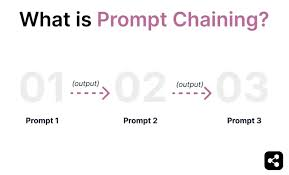


## What It Is

**Prompt Chaining** is the practice of breaking a task into multiple connected prompts.

- Each prompt handles a specific subtask, and its output becomes the input for the next prompt.
- Used to break complex tasks into smaller, manageable steps, enabling more accurate and controlled reasoning.



## What You MUST Learn

### 1. State Passing Between Prompts

- Explicitly pass outputs from one prompt to the next.
- State may include:
  - Text outputs
  - Structured data (JSON)
  - Scores, flags, or decisions
- ⚠️ **Poor state handling leads to context loss and hallucinations.**

### 2. Error Propagation Control

- Errors in early prompts can cascade through the chain.
- Common control mechanisms:
  - Validation prompts
  - Output format enforcement
  - Confidence checks
  - Retry or fallback logic

### 3. Modular Prompt Design

Each prompt should:
- Perform one clear task
- Be reusable and replaceable
- Have clearly defined inputs and outputs

✅ **Encourages scalability and maintainability.**


## Key Skills Developed

### 🧠 Pipeline Thinking

Think in terms of step-by-step data flow:

```
Input → Process → Transform → Decide → Output
```

Similar to data engineering and ML pipelines.

### ⚙️ Workflow Engineering

Designing structured, deterministic AI workflows.

Includes:
- Sequencing
- Branching
- Looping
- Validation

**Foundational for Agentic AI systems.**



## How Prompt Chaining Works

1. **Initial Prompt**
   - Defines the first subtask clearly.

2. **Model Output**
   - The LLM generates a response based on the prompt.

3. **Next Prompt**
   - The output is evaluated and embedded into the next prompt.

4. **Repeat**
   - The process continues until the full task is completed.



## Types of Prompt Chaining

### 1. Sequential Chaining

- Linear execution
- Each prompt depends directly on the previous output

**Example:** Extract → Summarize → Rewrite

### 2. Conditional Chaining

- Flow branches based on model output
- Different prompts are triggered depending on conditions

**Example:**
```
If sentiment = positive → Generate praise
If sentiment = negative → Generate apology
```

### 3. Looping Chaining

- Repeats the same prompt structure over multiple inputs

**Example:** Summarizing multiple documents one by one


## Why Use Prompt Chaining

| Benefit | Description |
|---------|-------------|
| **Breaks Down Complexity** | Simplifies large tasks into smaller, solvable steps |
| **Improves Accuracy** | Guides the model through logical intermediate outputs |
| **Enhances Explainability** | Each step is explicit and traceable |
| **Maintains Context** | Context is preserved across prompt transitions |
| **Manages Context Limits** | Helps work within LLM token constraints by chunking tasks |
| **Enables Workflow Automation** | Forms the basis of structured AI pipelines and agents |


## Prompt Chaining vs. Chain-of-Thought

| Aspect | Prompt Chaining | Chain-of-Thought |
|--------|----------------|------------------|
| **Structure** | Multiple prompts | Single prompt |
| **State** | Explicitly passed | Implicit reasoning |
| **Control** | High | Limited |
| **Explainability** | External & traceable | Internal to model |
| **Best for** | Workflows & agents | Reasoning within one task |


## Summary

- **Prompt Chaining:** Output → Input across multiple prompts
- **Chain-of-Thought:** Step-by-step reasoning inside one prompt

**Key Takeaway:** Prompt chaining is essential for building robust, scalable AI workflows and is a foundational technique for agentic systems.

In [25]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0,api_key=open_api_key)


parser = StrOutputParser()

extract_prompt = ChatPromptTemplate.from_template(
    "Extract key points from the following text:\n{text}"
)

summary_prompt = ChatPromptTemplate.from_template(
    "Summarize the following key points:\n{key_points}"
)

extract_chain = extract_prompt | llm | parser
summary_chain = summary_prompt | llm | parser

chain = (
    {"key_points": extract_chain}
    | summary_chain
)

result = chain.invoke({
    "text": "Prompt chaining improves reliability and control in LLM systems."
})

print(result)

Prompt chaining improves the reliability of Large Language Model (LLM) systems by allowing for more structured interactions. This technique also offers enhanced control over the outputs produced, leading to more accurate and relevant results.


# 21. Retrieval-Augmented Prompting (RAG)

Retrieval-Augmented Prompting (commonly known as **RAG**) is the practice of dynamically injecting relevant, external facts into a prompt before sending it to the model. Instead of relying solely on the AI's "internal memory" (training data), RAG allows the model to "look it up" in a provided library of documents.



### What It Is

* **Open-Book Exam:** If standard prompting is like an AI taking a test from memory, RAG is like giving the AI the textbook and asking it to find the answer.
* **The "Grounding" Layer:** It provides a factual foundation for the AI’s response, ensuring it stays tethered to your specific data (PDFs, databases, or live web feeds).
* **Just-in-Time Knowledge:** It solves the "Knowledge Cutoff" problem by feeding the model current information that wasn't available when it was originally trained.



### What You MUST Learn

#### 1. Query Formulation

Converting a user’s natural question into an optimized "search term" for the retriever.

* **Technique:** "HyDE" (Hypothetical Document Embeddings), where the AI generates a fake "perfect" answer first, then uses *that* fake answer to search for real documents that look like it.

#### 2. Context Window Management

You cannot feed a 1,000-page book into a prompt. You must master:

* **Chunking:** Splitting documents into small, logical pieces (e.g., 500-token paragraphs).
* **Token Budgeting:** Deciding how much space to give the "Found Facts" versus the "User Question" so you don't hit the model's memory limit.

#### 3. Grounding & Hallucination Reduction

The most critical part of RAG prompting is the "Constraint."

* **Instruction:** "Use ONLY the provided context to answer. If the answer isn't there, say you don't know. DO NOT use outside knowledge."
* **Citations:** Prompting the model to include source tags (e.g., `[Source #1]`) to prove its answer is real.



### Key Skills

* **Retrieval Integration:** Knowing how to "stitch" together a search engine (Vector Database) and the LLM into a single automated pipeline.
* **Knowledge Grounding:** Designing "System Instructions" that force the model to act as a faithful librarian rather than a creative writer.


### Comparison: Standard Prompt vs. RAG Prompt

| Feature | Standard Prompt | RAG Prompt |
| --- | --- | --- |
| **Data Source** | Training data (static). | External docs (dynamic/live). |
| **Accuracy** | Prone to "hallucinations." | High (if the retrieved data is correct). |
| **Cost** | Lower (shorter prompts). | Higher (retrieved text adds tokens). |
| **Use Case** | General chat, creative writing. | Customer support, research, internal tools. |



### Best Practices

1. **Reranking:** Don't just trust the first 5 things the search engine finds. Use a "Reranker" model to check if those 5 things are *actually* relevant to the question before prompting.
2. **Metadata Filtering:** If a user asks "What happened in 2022?", filter your search results to only include files with a 2022 timestamp before they reach the prompt.
3. **Negative Constraints:** Explicitly tell the model: *"Avoid saying 'Based on the documents provided...'—just answer the question directly."*

In [26]:


### Code Example: A Simple RAG "Stitch"

#This is the logic used to combine a retrieved "Fact" with a "Question."

def generate_rag_prompt(user_query, retrieved_chunks):
    # This function creates the 'Augmented' prompt
    context_block = "\n".join([f"DOC {i+1}: {text}" for i, text in enumerate(retrieved_chunks)])

    prompt = f"""
    You are a Fact-Checking Assistant.
    Use the following pieces of retrieved context to answer the user's question.

    CONTEXT:
    {context_block}

    USER QUESTION: {user_query}

    RULES:
    1. Answer ONLY using the context above.
    2. If the answer is not in the context, state: 'Information not found.'
    3. Cite the document number for every fact you mention (e.g., [DOC 1]).

    ANSWER:
    """
    return prompt

# Example retrieval (In a real app, this comes from a Vector DB)
chunks = ["The 2024 company holiday for New Year's is January 1st and 2nd.",
          "Remote work is allowed up to 3 days per week."]
query = "When is the New Year's holiday?"

print(generate_rag_prompt(query, chunks))


    You are a Fact-Checking Assistant.
    Use the following pieces of retrieved context to answer the user's question.

    CONTEXT:
    DOC 1: The 2024 company holiday for New Year's is January 1st and 2nd.
DOC 2: Remote work is allowed up to 3 days per week.

    USER QUESTION: When is the New Year's holiday?

    RULES:
    1. Answer ONLY using the context above.
    2. If the answer is not in the context, state: 'Information not found.'
    3. Cite the document number for every fact you mention (e.g., [DOC 1]).

    ANSWER:
    


# 22. Context Compression Prompting

**Context Compression Prompting** is the practice of shrinking large amounts of input data (documents, chat histories, or search results) into a smaller, denser format before sending it to a Large Language Model. This allows you to stay within "Context Window" limits while significantly reducing token costs and latency.



### What it is

* **The "Information Sieve":** It acts as a filter that removes redundant words, stop-words, or irrelevant sections while preserving the "semantic core" of the message.
* **Efficiency First:** Instead of feeding a 50-page PDF to an LLM, you compress it into a 2-page highly-concentrated summary or a set of "key-value" pairs.
* **Cost Management:** Since LLMs charge per token, compression directly lowers the price of every API call.


### What You MUST Learn

#### 1. Lossy vs. Lossless Compression

* **Lossy Compression:** Uses an LLM to summarize text. Some nuance is lost, but the output is highly readable and significantly shorter (e.g., a 1000-word article becomes a 100-word summary).
* **Lossless (or Near-Lossless) Compression:** Uses specialized algorithms (like **LLMLingua**) to remove tokens that are mathematically "redundant" based on probability. The result might look like gibberish to humans but remains perfectly understandable to the AI.

#### 2. Relevance Scoring

You must learn how to rank chunks of text based on their importance to the current user query.

* **Concept:** If the user asks about "Revenue," a paragraph about "Employee Benefits" should receive a low relevance score and be "compressed" out of existence for that specific turn.

#### 3. Chunking Strategies

Before you can compress, you must break text down.

* **Fixed-size:** Breaking at exactly 500 characters.
* **Semantic:** Breaking where a topic ends (paragraphs or sub-headers).
* **Overlapping:** Keeping the last 50 tokens of one chunk at the start of the next to maintain context across the breaks.


### Key Skills

* **Context Optimisation:** Balancing the "compression ratio" (how much you shrink it) against the "accuracy" (how well the AI still answers).
* **Token Efficiency:** Crafting system instructions that force the model to be extremely concise, using shorthand or structured data rather than flowing prose.


### Comparison: Standard RAG vs. Compressed RAG

| Feature | Standard RAG | Compressed Context |
| --- | --- | --- |
| **Token Usage** | High (sends full text chunks). | Low (sends only core meaning). |
| **Latency** | Slower (more tokens to process). | Faster (shorter input = faster TTFT). |
| **Accuracy** | High (full detail available). | Variable (depends on compression quality). |
| **Best For** | Fact-heavy, legal, or medical tasks. | High-volume chat, mobile apps, or cost-saving. |


### Best Practices

1. **Semantic Ranking:** Use embeddings to find the top 5 most relevant paragraphs before attempting to compress them.
2. **Instruction Density:** Tell the model to use "Telegram Style" (e.g., "Market up 5%. CEO resigned. Stock stable.").
3. **Validation:** Occasionally run a "loss check"—ask the model to reconstruct a specific detail from the compressed text to see if it was accidentally deleted.

In [27]:
### Code Example: Simple LLM-based Compression

#This uses a "Small Model" (like GPT-4o-mini) to compress context for a "Big Model" (like GPT-4o) to save money.


def compress_context(long_text):
    # Use a cheaper model for the 'Lossy' compression step
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{
            "role": "system",
            "content": "Compress the following text into a dense, bulleted summary. Remove all fluff. Preserve all numbers, names, and key facts."
        }, {"role": "user", "content": long_text}]
    )
    return response.choices[0].message.content

# 1. Take a 2000-word document
source_text = "..."

# 2. Compress it to ~200 words
compressed_prompt = compress_context(source_text)

# 3. Use the 'expensive' model for the final reasoning with the compressed data
#final_answer = client.chat.completions.create(model="gpt-4o", prompt=compressed_prompt...)


# 23. Prompt Templates

**Prompt Templates** are reusable, structured frameworks used to guide the creation of consistent AI inputs. Instead of writing a new prompt from scratch for every request, you define a **"Master Blueprint"** that contains fixed instructions and dynamic slots for specific data.


### What it is

* **Blueprint for AI:** A static string of text with defined "holes" or placeholders that get filled at runtime.
* **Consistency Engine:** Ensures that regardless of the specific user input, the model's persona, constraints, and formatting rules remain identical across every call.
* **Separation of Concerns:** Decouples the *logic* of the prompt (the template) from the *data* (the user query or context).


### What You MUST Learn

* **Variable Placeholders:** The syntax used to mark dynamic sections (e.g., `{topic}` in f-strings or `{{user_name}}` in Jinja2). You must learn how to handle different types of variables, such as `UserQuery`, `RetrievedContext` (for RAG), and `SystemInstructions`.
* **Prompt Parameterisation:** The process of "injecting" real-world values into your templates. This includes managing default values, handling missing parameters, and sanitizing input to prevent prompt injection.
* **Version Control:** Storing templates in a central repository (like Git or a Prompt Registry). You must learn to use **Semantic Versioning** (e.g., `v1.2.0`) to ensure that an update to a template doesn't break production applications that rely on the older structure.


### Key Skills

* **Prompt Standardisation:** Creating a uniform "style guide" for prompts across an entire organization. This ensures that every developer uses the same structure for things like **[Persona]**, **[Task]**, and **[Output Format]**.
* **Scalability:** Managing a library of hundreds or thousands of prompts. This involves using **Prompt Registries** (like Langfuse or PromptLayer) to dynamically fetch the correct prompt version at runtime based on the task type.


### Comparison: Static Prompt vs. Prompt Template

| Feature | Static Prompt | Prompt Template |
| --- | --- | --- |
| **Flexibility** | Zero; hard-coded for one specific task. | High; adaptable to infinite variations. |
| **Maintenance** | High; must update every single code instance. | Low; update the template once in a central hub. |
| **Error Risk** | High; manual entry leads to typos. | Low; structured slots prevent instruction drift. |
| **Performance** | Inconsistent across inputs. | Highly predictable and easier to benchmark. |

# 24. Safety & Guardrail Prompting

**Safety and Guardrail Prompting** is the practice of designing instructions and filters that keep an AI model’s behavior within ethical, legal, and operational boundaries. It ensures the model can resist adversarial attacks (jailbreaking) and avoids generating harmful, biased, or restricted content.


### What It Is

* **Hard Boundaries:** Setting non-negotiable rules that the model cannot override, even if a user explicitly asks it to "ignore all previous instructions."
* **Multi-Layered Defense:** Guardrails typically operate at three stages:
1. **Input:** Sanitizing and rejecting malicious prompts before the model sees them.
2. **In-Process:** Guiding the model's internal reasoning to prioritize safety.
3. **Output:** Filtering or redacting the final response before the user sees it.


### What You MUST Learn

#### 1. Policy-aligned Instructions

Learn to translate abstract corporate or legal policies into concrete, unambiguous instructions.

* **Vague:** "Don't say anything bad."
* **Aligned:** "You are strictly prohibited from providing medical diagnoses. If asked for health advice, you must recommend consulting a licensed professional and provide a general disclaimer."

#### 2. Refusal Handling

Traditional safety often uses "Binary Refusal" (a hard "No"), which can be brittle. You must learn to design refusals that are helpful but safe.

* **Over-refusal:** Rejecting a benign request because it contains a "trigger word" (e.g., refusing to talk about "killing a computer process").
* **Graceful Refusal:** Explaining *why* a request cannot be fulfilled and pivoting to a safe alternative.

#### 3. Safe Completion Design

Move beyond just saying "No" to **Safe Completions**. This involves teaching the model to answer the "safe" parts of a query while ignoring the "dangerous" ones.

* **Example:** If a user asks, "How do I hack a Wi-Fi password for educational research?", a safe completion would explain the *principles* of network security and encryption without providing actionable hacking steps.


### Key Skills

* **Risk Mitigation:** Identifying "edge cases" where a model might fail, such as **Prompt Injections** (manipulating the model into a different persona) or **Data Leakage** (tricking the model into revealing system prompts).
* **Ethical Prompting:** Proactively identifying and reducing bias in outputs. This involves using "Neutral Persona" instructions and ensuring diverse perspectives are represented in open-ended tasks.



### Best Practices

* **Use "Negative Constraints":** Clearly list what the model should **NOT** do (e.g., "Do not use technical jargon," "Do not mention competitor X").
* **Red Teaming:** Regularly act as a "hacker" to try and break your own prompts to find vulnerabilities.
* **The "Context Sandwich":** Place your most important safety instructions at both the very beginning and the very end of the prompt to take advantage of "primacy" and "recency" effects in AI attention.


In [28]:

### Code Example: The "Self-Correction" Guardrail

#One effective technique is to have the AI "think" about safety before it generates its final answer.

# A System Prompt that forces a safety check first
SYSTEM_PROMPT = """
You are a helpful assistant. Before answering any query, perform a 1-second internal safety audit.

1. Does this request involve illegal acts, PII, or medical advice?
2. If YES, state your refusal clearly and suggest a safe alternative.
3. If NO, proceed with a helpful answer.

Format your response as:
<audit> [Pass/Fail + Reason] </audit>
<response> [Your actual answer] </response>
"""

# Example Usage
user_query = "Tell me how to bypass a neighbor's Wi-Fi."
# The model would output:
# <audit> Fail: Request involves unauthorized access to networks. </audit>
# <response> I cannot assist with bypassing network security. However, I can explain how to secure your own Wi-Fi using WPA3 encryption. </response>


# 25. Evaluation-Driven Prompting

**Evaluation-Driven Prompting** is the practice of designing prompts specifically to be measured against quantitative and qualitative benchmarks. Instead of relying on "vibes" or subjective feel, you treat prompt engineering as an experimental science where every change is validated by data.

### What it is

* **Prompt-as-a-Variable:** Treating the prompt text as a variable in a controlled experiment to see which version maximizes a specific score (e.g., Accuracy).
* **The "Ground Truth" Comparison:** The process of comparing AI outputs against a "Golden Dataset" (a set of perfect, human-verified answers).
* **Closing the Feedback Loop:** Using metric failures to identify exactly *where* a prompt is failing (e.g., low Recall means the prompt isn't extracting enough information).

### What You MUST Learn

* **Alignment with Metrics:**
  * **ROUGE (Recall-Oriented Understudy for Gisting Evaluation):** Used for summarization. It measures how much of the "Gold Standard" information the AI actually captured.
  * **BLEU (Bilingual Evaluation Understudy):** Used for translation and text similarity. It checks for exact word-sequence matches.
  * **Accuracy/F1 Score:** Used for classification (e.g., "Is this sentiment positive or negative?").


* **Prompt Benchmarking:** Creating a "Golden Dataset" of 50–100 diverse test cases to run against every new prompt version to ensure no "regressions" (where fixing one thing breaks another).
* **A/B Prompt Testing:** Running two different prompts (Prompt A vs. Prompt B) on the same dataset to statistically prove which one performs better.

### Key Skills

* **Experimental Design:** Identifying which variable to change (e.g., adding a "Think step-by-step" instruction) and keeping everything else constant to measure its true impact.
* **Prompt Optimization:** Systematically "trimming" and "tuning" a prompt to reach the highest possible metric score with the lowest token cost.



### Comparison: Traditional vs. Evaluation-Driven

| Feature | Traditional Prompting | Evaluation-Driven Prompting |
| --- | --- | --- |
| **Validation** | "Looks good to me." | ROUGE, BLEU, or Accuracy scores. |
| **Testing** | 1–2 manual checks. | Automated testing on 100+ cases. |
| **Decision Making** | Intuition-based. | Data-driven (A/B testing). |
| **Scalability** | Hard to maintain as logic grows. | Highly stable due to regression testing. |



### Best Practices

1. **Use "LLM-as-a-Judge":** For creative tasks where word-matching (BLEU) fails, use a more powerful model (like GPT-4o) to "grade" the output of a smaller model based on a rubric.
2. **Monitor for Regression:** Always run your *entire* benchmark set after a change. A prompt that makes "Summary A" better might make "Summary B" much worse.
3. **Thresholds:** Set a "Minimum Quality Bar." If a prompt change doesn't increase your metric by at least 5%, it might not be worth the added complexity.

In [29]:

### Code Example: Simple A/B Testing with ROUGE

#This Python script compares two summary prompts using the `rouge-score` library to see which one better matches a "Human Reference."

from rouge_score import rouge_scorer

# 1. Define our "Ground Truth" (What a perfect summary looks like)
reference_text = "The company's Q3 revenue grew by 15% due to high demand in Asia."

# 2. Two different outputs from Prompt A and Prompt B
output_a = "Q3 saw a 15% revenue increase, mostly from Asian markets."
output_b = "The financial report indicates the company is doing well globally."

# 3. Setup the Scorer (Focusing on ROUGE-L for sequence overlap)
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

score_a = scorer.score(reference_text, output_a)
score_b = scorer.score(reference_text, output_b)

print(f"Prompt A ROUGE-L: {score_a['rougeL'].fmeasure:.4f}")
print(f"Prompt B ROUGE-L: {score_b['rougeL'].fmeasure:.4f}")


Prompt A ROUGE-L: 0.1667
Prompt B ROUGE-L: 0.1667


# 26. Multimodal Prompting

Multimodal Prompting is the practice of providing inputs to an AI model that combine different formats—such as **text, images, audio, and video**—to achieve a single outcome. Instead of just "reading," the model "sees" or "hears" the context alongside your written instructions.


### What it is

* **Sensory Integration:** Giving the AI "eyes" and "ears" to understand the physical world or digital media.
* **Non-Verbal Context:** Using an image to provide information that would be too complex to describe in words (e.g., a hand-drawn diagram or a blurry medical scan).
* **Inter-modal Cooperation:** The model uses the text to focus its "attention" on specific parts of the visual or auditory input.


### What You MUST Learn

* **Cross-modal Instruction Clarity:** Learning how to refer to objects within an image or video so the model doesn't get confused (e.g., "Look at the red graph in the top-right corner").
* **Image Grounding:** Ensuring the model's textual response is strictly based on the visual evidence provided, rather than hallucinating based on general knowledge.
* **Modality-specific Constraints:** Understanding the limits of each format. For example, some models can "see" text in images (OCR) but cannot accurately judge the exact distance between two objects in a 3D space.


### Key Skills

* **Multimodal Reasoning:** The ability to draw conclusions by combining a visual clue with a logical rule.
* *Example:* Looking at a picture of a wilting plant and a text prompt about its watering schedule to diagnose the problem.


* **Instruction Fusion:** Blending a command and a piece of media so they function as a single unit of logic.


### Comparison: Text-Only vs. Multimodal Prompting

| Feature | Text-Only Prompting | Multimodal Prompting |
| --- | --- | --- |
| **Input Depth** | Limited by your descriptive ability. | High; captures "a thousand words" in one file. |
| **Logic** | Relies on linguistic patterns. | Relies on spatial and visual patterns + text. |
| **Main Challenge** | Ambiguity in description. | "Noise" or clutter in the image/audio. |
| **Best For** | Writing, Coding, Summarizing. | Design, Troubleshooting, Medical, Security. |



### Best Practices

1. **Reference specific visual areas:** Use terms like "the foreground," "the text in the bottom left," or "the person wearing the blue shirt."
2. **Use High Resolution:** If the task involves reading text or small details, the image quality must be high, as models "downsample" images during processing.
3. **Sequential Multimodal:** For video, describe the timestamps if possible (e.g., "What happens at 02:30?").

In [30]:
### Code Example: Analyzing an Image with GPT-4o

#This Python snippet demonstrates how to send an image (via URL) along with a specific text instruction to perform "Image Grounding."

def analyze_fridge_contents(image_url):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "What can I cook with the ingredients you see in this fridge? Provide a recipe."},
                    {
                        "type": "image_url",
                        "image_url": {"url": image_url},
                    },
                ],
            }
        ],
        max_tokens=300,
    )
    return response.choices[0].message.content

# Usage:
# The model "sees" the eggs, milk, and spinach in the photo and suggests an Omelet.
img_link = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAQEBAPEBAQFRUVFhUVFRUVFxYVFhUWFxUWFxUVFxUYHiggGBolHRUVITEhJykrLi4vGB8zODMsNygtLisBCgoKDg0OGhAQGi0lHyUtLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS8tLS0rLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAABAAIDBQYHBAj/xABSEAABAwIDBQMHBwUMCQUBAAABAgMRAAQSITEFBhNBUSJhcQcUMoGRobEjQlJTksHRNGJydIIVFiQzQ2STorLT4fBEY3ODs7TCw9JUlKPU8Rf/xAAZAQACAwEAAAAAAAAAAAAAAAABAgADBAX/xAAvEQACAgEDAgQEBgMBAAAAAAAAAQIRAxIhMQRBE1FhcRQiMrGBkaHB4fAjM0IV/9oADAMBAAIRAxEAPwDjBFKKdFKK0tFVjYoU6KUUpBsUop0UopSDYoxRilFQgAKMUYpRQIKKQFGKcBUANinAUQKMVBRsUYp0UoqAGxRinRRioCxsUop8UooksZFKKfFKKhLGRQipIoRQJYyKEVJFCKgbI4oRUkUIqBsZFKnRSqEsEUIp8UIq9oYtN2d3X9oPcJnICCtZBISDMZD0lGDA7joASNz/APyxIEEXij1BSif2eEqPaasfJAwBahwZKNw9J6wygJ9kn2mvMbm9AnH/AFjWWcndIsSVHkV5M0D+Tvftp/8Ar151+TxA/kr7+kR97FWDG2L4KCEu4lGYSCSTGsAaxVqzvDfM5OspJMHtqdSQO4BYy9VJql5k2Mk5uSynVq+Hi6yP+1UR3StvoXf9Mz/dVuv34v8AO3Hqdc+9RryXG910SClspHQqxT6zQuXmT5TGq3XtR828/pWvuZqFW71oPm3n9Ij+4roDG8V4ojE1l1KR96a0Ozxx09tDR/YSfuqXLzJscht91mnkFVuzeuEHCocVtKQcpGMsdD0q3a8nSSBibukmBI47BAPMfxWfsrqNvZtMKcCUNgZHDAAJUBJgc8q9BuWwmQ5bgQJIgxOkmcqmp92HScvR5M2j894f71CvdwBPtrLb3boPbPKVKONpZhLmEphUTgWnkqASMyDB6EDuX7rM4QrztqDoU4TpE6eIqo3/AGkO7LvCVleFCVpzGqVoKSI/znTRnvyCUNjgYFEJmnAU4CrzNZ6GtmPK9FBV4EfjUDzC0HCtKknooEH30UEpMpJB6gwfaK0ext5gIZv2hdW5yUDk8j85tzIyO8+sVCbGYijFaTe7dsWZaeYcL1pcJx270ZkDVtfRxPPIeAggZ/DUA9iOKUVJhpRUoFkUUoqSKUVCWRRQipCKBFSg2RkUCKkigRQDZHFKnxSqEsbFCKeRQIrU0Odg8kQ/gI/WHf8AhorwM3iHW0kutCQCQlWYnvz5Z1Y+SL8hH6w5/YbqisdmNJCQpy4VA+oQPA5Pk9PZXNz6tTo14dFfMU23UIQ801ksJC3DJBT2swTGYzHuq7tdqW9sl1KmlnCCBwuGPQOEKXjIxE4kiRGhy6+i82IL1bSw+8EsoKMPAnVRBUSHM+Q56Ur3YjZxcK44ZWkheJpapUVBRUANM+WdZ9M9aZJaLdcEnBuHbZD/AJo5K+02pLqQFIIlJDZbJVl+cPVpVRs/Z7oFnduuOKYS8FrBbISEBcqJIzUBmfUIrTWW0X2bdFqLy3OFKEyWbiYQkJHWJAE+vrVy3t9oWSLUvS4loN48LoSVBGEKAwEgTTNSbI3FcUUV9aqUltSFNQVqIVxAkkEI9ETl4HTKtL5PW1ebq4hlQcWDmDpHMVmtirZbt2bdV0hS0E4jgdhcnmpTckwB6xWw3JtSzb4FLQslS1konDmdO0AZ9VWYlTFk0ym3n4biE8XEsgTABIJwQQSkHCfVWSurTsqShgqHZIlo6lKscHCDE4dc66vcoxF39JH9k16vM0QMuQqSxqTsaE3EyezFMBu3bS2pEJTi7JABwiR7RTd8nWv3NvUomeF+d9JPM1rBZI6VQ7/W6U7MvSPq/wDrTUWL5k7FlL5WfPgFOinRRArYYLGgU9pkqISkEk8hRApyJBkEg9Rkagtmy3QbVc2l/sd1Kgrhm7tgoEFDzXpJSDpjSY+11rN7V2G9bNWrr2AecNl1CJ7aUSMKlpjs4pkevSK1u4u/htnmkXyUusgnC6pOJ1jEkpKkqAlSSCQRmYPqOb3s2sb29uLkmUqWQ3qAGkmGgAdOyAY6k9aCux5NafUpIpRUkUopiuyOKEVLFCKhLIiKEVKRTSKFBsiIoEVKRTSKg1kcUqfFKgEjIoRUhFCK2NDnXvJJ+Qp/WXP7LVYXaO37wBJSpDSSJQAlKlKAJ7SsQISCRpHL27ryT/kKf1lz+yzXP7gLcW0haQ2pSEwvIogCNSNcow5euuXnlpmzd08NS3NJunvI0tt5FylvGE4kmOyrtGQkZ4VZ+uvXsa7evlFTYaS2F4TiOJS4zUAnl41zVjaDls8vDgVhVhxZqSYPdH+fCtPs2/TxG7lkFtST8rhSAkqKSeyhUwSJnWQetZ8uSUV+4qipZNKNXvCyqzS245gKVHCCnKFHQQev3VjNsbyOqXw7fsgaqgEk9Ac8vV1qy312k7eMsYBIUtQiQMJHzhnEQFZ9Ce6qzZLDbQW06CpagojDHox2QhQntf41XDPcL7+Xcmfp547dbefbf1HjeF1CUKU12ssSjkFRrGkTXat0b9t9jiNTAKk55Hs8/WCD6641tNtCQ22MGEwcKfEJMzEZZGc5FdL8kV0HbEwkApcKVEEkKKUIGITpp7qvwZHMzwdstdobUKT2SlJWpsZ5+kmI9hNJW2nG+KJQQ3GZGehyyI6VLe7JbUTr2VJCZjIYcuWtTubuoUIKlQc1aZ5ZzQljyNtqRthkxpJOJ5Ttx0rShKW5UkqGpKYj2691U2820X7jZ16lTaQMBT2QolRCk5gcvDOtfx2WUxKUgD15dYzNZe430Zfu27W1U4taQ4VkBSQOykpgmJ56U0YSTTchZzg00onFBZufVufZV+FEWbn1bn2VfhXb39oPhUGRPVUR7K9HAW62oecLSo6KTnh74Ota9Zg8H1OFCzd+qc+yr8Kd5k79U59hX4V2zazzNswexxVAem8Ssk9QJhOfSuWbU2s6pRPFc5nJSh99LLLp7BXT33KfzJ36pz7CvwpeZu/VOfZV+FXO7d46bpsF10iFarUfmnvrYOXC8R7a/tGqn1VdhvhPU5t5m79U59lX4UvM3fqnPsq/CulouV/TX9o1O3cL+mr2mj8V6E+E9TlvmTv1Tn2VfhQ8yd+qc+wr8K2G0LlzHAcc1+kr8asLdl1aEkPKBUSBJVlHrofFehPhPU526wtPpJUn9IEfGoiK367a7BkLxhQIKSSQqNQUGQQehrMbf2dwihwN4A4FdjUJWkjGE/m9pJHTERyq3HmU3RVkwuCspSKaRUpFNIq0qTI4pU+KVQNkZFAinxSIra0W2dW8lH5IgfzlfwarMfvZuVqSFNvhBSMU4TmlUp18TI7q0/kr/Jmx/OV/Busds+4vXi4UBoISSMayEp15k8/Ca4/UwUpu3Rv6fJKC+VWDau6l84Qptt1XFgvgBtISUEYCkE9B15VEzuxeJdW4406pQ/i14mQYGSZGPKry24qUFJet8ZmILiQTygqRhJkxqKrGtp3RUUkgGQlIwglRMAQJk68qpqGmrJOM9eqqfJau7BcW2tS1FS0pHDQpbHPVM4sj39KrNpbBuXAhKUoEEqkvW6SCc8gF9fhVuF3OGPMbvFGqW8pjOMRB61UtvXBeDCg6259WUSs8xCYOUZzVaw44bp8Gl9VlypwaW/ff3/YDm7dypGDisrCkjEOOyFAkgKA7RgQJy1yHWujeSnZr1tbONPIQDjxgpWF4sQAzgmD2RWR3f2dcJuAl1p7BB7SkFInlyyrrOzrdIahHNJ+HWtONLlGDRpZS7f2i4y4tKEFYwlZAIBBAgag4gdIy9deHdvfJd4+q0dQBIXBRCoCUSQszkZB0B0jKpNpWaw6VlKsODhwBoqQdeWlU26mz1tbQbK0AFQckgRPyTnICOnT1zVF5PFd8GmMYOPrRvE2raREJz61zRYwbxnliYH9lf4V064yCf0k/GuZ7aGHeBg9WD/1/jWh8ooNFtdWQNT7PuOzVftdzs1DbXENkzyq4rZUb77SMBE6msE8qTVlvJe43ddKqFGs+SVstgti23U/Kk/oq+FbBw9o1j90vyn9hX3VrFntGs0uS1cEqTXoaNeNJr1stLKSoJUQAcwCR7aKCUF3m4PGrNlUKtB3uq9iTVW4flBVgtUKa/NZdV7cqiAxWF2v+CCfTU8VT0GKPgKpt7Lgu29msjVd1HgCwB8KsbXI2/wCbbOL+1P8A5VV7wD+B7P8A9+ftcE1f0/1oz9T/AK2ZoimkVKRTCK3nNTGRSp0Uqg1kcUCKeRQIre0WnUfJYf4O1+sr+DVZFhp9SSlpnRShJVkU41KGUcsSs+8ZZTWt8mH5Ox+tK+DVYxzfZ5hbiLdlhJC1CcKtQrpiz5+2uN1Mbm/c34MihTZdIt7kt4EpSFEHEMZJjoMhFPu7cm5sVrDDHyqcMBROJOEFSiQOyeyMj7a8TnlHuA3ihAJygtoVnGmYNDZ23b15PHXb2JxElslm3Q6oJ+iC2ZjxFZXGMN5SL5Z/EVRR2VKFJSFqU0QO1IJz7JED21i97mEM3Y2txZU2ltIakBKhOHNWZntk5DlWEV5R7pRCG8ZOgCUokHphCRV5u7tO/vFlKbx0FPpIzSofCjkjGKKFkOsN3oUBkIKQQQeoqv3Fs1MW6mFKKy2spxQQFdlJlIPLOPEGsBcuXtpcst3NzcKbdMA8VRIPMEE949tdS2RbBtGpMxmSScuWdNhj3uySnfYS0g8T9Mx4wK9rjI9KBIBz9UVSbV2klhKlKnN1wACJOFOIxOWQSo+qvWztdLgZAIl1rGNZPZk6ZAia0WuCvUroV0ez60/2hXNt7eztuyV1aWPf/jXRbtXYV4T7M65xv8cO1dnq/NdHsKPxqt8jnq2s9ymqy8vMDJzp21H8wKz+2HlqwtNpUpSjASkFSiegSMyascqESsz9y7iWT30jWstvJxeQ0q6dYtQ4oISHFYllRBITgTlMJOWKrhe4+z7dShcXjzik/wAmhKW+IrCVYUqUTMxyNZpbclpldzkk3CgAScBgDM+knlW/st3H3TKxw0k/OkqPgkffFXOwzs63bm3bDYhRKsJJ7BIUFLzJgpIzNXwcxQpJyIBEQRBEg0ui9x06PBs/dq2azUCtXVX3DQVagNghAiYMeqig6ZiOZpl/dBlpTvDW4QBhQmJUokAASQBrqatSSJuQ3exbZ7NbKFH6UQftDOqW/wBxErxqaeUglotpSoYkiTMzrXl27t24Tw8SHGScKxLrSWiAZWFLTJOEdBz0qPc/b9w+oIW82V4lKwkOdpokxAiFARAVl3zFZ31GO2qL100njc0+OUVe0d0r1oOKDXEAtw0ktnESRE9jJXLpWY3rZUhq0bUlSSjiJgggzw7ecjXWjvOlq5FtcSkqKQhJzKgowMKkZKjmDBisr5cfSsPC4+LNaun0uVxMHVxlHG9S8jlRFMUKmIpihW45aZFFKnxSqDERFAinmmmui0Xo6V5M1/I26f5yT72hXMuDN08CYHGdz/bVXSvJx/F2/wCsn4s1z/aGzLoXNxgYd/jnYIQoggrVBkDwri9SrlKjR/yiHaTSArIECCCBrhwkwetaLd25dDAWGEucMfJmYLajmEkHXlE9Kr2N1753DNq+c85woAByUcyCa0Gxt1NpoQ5Fs4FKAIJdaAxJUCgEBZBQRrOY5TXPzYXOGmrNXRSUZNy4Mq3sy5YfN0w4hxYl1aYIgKnEFp5Zz7qvrBTreO4Fx8o6IUQIIA7OQiB1nOr+93N2q4VlpLaVLAJUpQBbUTLiUFsdpB7xzp9t5Pr9LYbddtJHPE57wUCkyY80orY6PSvo1kl4vHbk9mxtks7SbTdPFwraUUBRUMRIzOgiJ5RyFdB2RcYsaCBKCNOYIkHuOo9VYfdjd56xC217TtClRKsHDBIUeY+VB91abY5YQl1AuQ8tzMmAB2UxCQJhMA5EnnnT9NizQyPV9JgzSxv6EeXbe1+CpbamVrSsO9sJUpIUVBOFWEGMs9RpVduteWpKGyol5LjoQM8klDzmU/N7SvXA5CrLaF80hSkLMEkkZHQk8x4Godj2zAQy/hSVAOKx4UlQxJcJGICfnERNbnDvZzHfjc/2y3uj2F/on4VzrylIUbzZykJlUugZE5wg5gZxlWwu9qqIIbRPj+E/fXja4rhlRTIymJjqI9ndWaeVdjpRxvuZhOyrpwYnGbZAiZU66T9kJFWW4tm4X3HLRywxowpclDy18MnPhlS8gYiRFSbfsHS2qHzpOGIn3ZVzZe0ri1dD1stbbieY96SPnDuOVLHI3LceUdtjTb9bUuhcueeNOqabdJbTnw5KAmUuJSMPZIIEyJJJOlUQ2ut9Kuy4pKSFcYEhcpT2ivJUpOkjBEA9RXpvPKA1eJwbQtnUrBB41ovAokZSplzsnLv9lJjZVs78s29dlCpUni2T2SjorGwVJUB4QedGULdv8ARntSLJDy4Wwi4dc4eEJWoEPICkklJcUD3jF2YAJIORTaWO2UJfQ+yp0OPBvFbQkKwoKoxqOEBEBQ5+j1BnN7KctcrZe0UKwqQBFs/KUjElYOIILZkp7WPKIzmrNe8VlZP8Jm0vn7lqWwXnEobgnEOy0VBYgiJGkTnSrG7djXFJUdZaehtLrjZbJSFKQSCUE8iRlPhXi2ltNhbK0lYAUPS0APIydQCOVZJ3a188yp55oTqlEQhI5EJ5meZmsHtS/fuV4TiJJgJE69AkZk91WymitRZpv3ZbdKm3uE6AQDiCVg4FSmFaxPxq8d2uHS0vsoU2ISpvsqj6JOcjurC2Hk32q6caWw0DGbqgnLvQJUPWK0Fh5O9ptqBcuLfCCPRLhJ66pFVvCmuBllafJ0jYJduSlxxKMCTjScIzXpKSZIPUisj5b/SsPC4+LNbzZt1gQG3DGEAA5wfdlXNPK5dcR5kAkhJdAOEgZpYJCTooTnI6kcq2YIqLSRj6p3B/3uc9NMNSGmEVrOWhlKnRQoDERFAinmga6bNR0LyeGGmP1k/Fmodo7x3DN0W0KhJWvRppSgEvONntKSc/kz7aduCqGmf9uo+9qvFtFh1V28toYuGp/Emf5y+dPA++uD1k9DlL1NeKLlSRZXO+DiFJS4q8Ri0OJtsR+wmoF71PrlKV3cFJhZeXGhOKBE6UrWzO0QpTnYDUpjIySAZzGXgK8z63GVi3DYcQhAUlUgEgykBR9Vc+PUzdXydCHTJRevb7ltt5nCyyXHVqBQlxRWoqJJVAgk5CIqm2a885KLcJISMzJ1z1rUbQYaeFsyuFINsyT34FA/ECvEi14dwhq14aeJOIHIYUgkqgcxkPXVXW9TLHPTHmvwG6XDFx1S4sr7VvIi4cCXRnGQEZwQfVW53UYQpDC0wQtbkn6QwrHr0FYu5sGW7p9V0pK1cMFqMgACcYIJzzKa1m4CyWmUxAClFI5AYTl3DWruglKVuTu/yE6tR0pxW1/mWd3sFu6zUVAhUCFEZSroe731WWG6ztteNvBY4KQuUkEkS0pPpTJzPMVqdmHX9M/FdSbcURbPkKUkhtfaSJUMtUiDJ6ZGuhKqbZzvDi2mZ6+ZEY21JwqHSZn6J515VskIJU6UwZnKAOhykeqoGtostshfFU4NASorUpROaROYM8so0gVUXKX7pyHVhlsCSnVQHUp/GK5EpuTqCOlCO3zMsnrdZISlJUXNAO1i8I09debam6jZaW44gKXhJS21AzAMBbkaSIJyAr17L2yhVtdOMLTjt0NtIUqFEIUSCuBzVHdoNK53d7YKX3VtuqdTPBS6CoQEJJw8InsHsnlpMHOr90tluLSle5OmybS2G3rBhtwEAqgOhZIEcPGpRAzzJ8BPK02C+nicJGIn53yiwYiIyI6co1GWVZ222qleNRnI4czKSCZMjn07q9T14hDQW2hSCCSFJUpESD36dwrNOUpOpfwaMajFbF+X7FG0kOLuHXEIhOFUKShaTBAgDEjLQ8415WdvYtMXL3HIUtSypCoAPDUTgKoEkwNTJyNcy2PdA4uypUKJKgMUAnU9MufKt/se7fubpQShsh1pDbZUsEtpSFJK8Iz5k+wU8pSjLfgTTcdjS3zcpSlMK7iY9419daLdHYrCEecBtvinECqBKU80g8utZBd8hDHF9EBSkpKuaUgHFHKZmPzqo9neU9Vq8cSCtk+mkQFDopPKe461uxtNJmOafB0Pbm3ENdoLSEZyQR2QDBJOfuqlG2n3VJctUcVtOS0qJQpQUIBClkAQRznllVcq+t71KnNmOocJAHCKuG+1qQQlRBMGJg6TrWcRZutL+WC2OIvNCmykFUgz9EACZPXDnWKcs2puX8F0Y462Ok+dwnEW30nCVlOHHCQM4UklJM+2Y1rCeU64S4LIpKVD5c4k6EHgwRVpsQOmA824FQThS6sonIJICtFd6Zy9lU3lGtylNmpTeBazcKXlEn5CDkTOUCe6r+hyuWVR7fwZutglhb9vuYg0w1IqmKrtHFQylSpUAjCKBFPNNNdJmtI2+5C4Zb7nVfFk/eKsLnYF0q4ui0g5uPZ8iFOKWDPWFR6qx2722vNVEKSVNqIKgDCgRopE5Tyjn1EAjqY8pGzYB4rg/NU27I8SlJHsNcrqencpO1aZpxZHB2nueLYG6VwylclQxwSCpJEgRIAGXtr0fvHlSypYGMAE4lTAmABoNTpTleUmw5OD1of/uqgX5SbU6OtjxbuD/2xWf4ZL/n9CyWeT5kXbe7DfYxKnCkIGUiAQcxocwM6kTu2yFYsSp7gB91ZpflEYOly2PBp/7268rm/jZ/0xP9G8Pg1TPFfMf0EWRrazXK3ZtSrGtKlHqo16Hbq3swFHAgnITiJPcAAa569vig6XafWLn7m6rrjeEL/wBJt+6UXJI9rdRRcVSi/wAhXK+51nYt22pAcxCFdpJ5EGT6tede7ajhSw6pGoSSIg58onKuKbI2yGXkr8+QEEnGEofg/s8KCZithb74WbqVsquRCkOYoS8gQlClKJKkADJJMyKWSbT2Y0ZK1uiRPyi+y21xSRjdAEDKAFKAEqjkPdrWf8oV6LS3Fs0ZcfzWvngESctMRyA6TV/snbNio4Grlk5EwhUwlIzy8KxO8rRunVPEKxr9BPRI9FISMyY17zWHVpVGvTbMjs/ajtqtS0doKSUOoUThcbVqk9OUEaGprZxheFtlwISVegspQ4k9caiEL8ZBPSrhjci+eSTwCgfScIT7iZHsqJfk2f8A/VWKT0LufwqxJSVMVScXcSP9wHEkvJWDlJSptwBUZgjLPxEirDdLaaHXl2ykMpdMpS46ThgwMLaIgkZmJBPfnXgR5Ptqtgqt3WlgfVPa+2B76q9o/ura/lHnDY+kc0n9sSPfSvBfLJ4sjaXdlbNLFuw1dFaF43LltCgMWWIcSMPUdAMh3PSq0bfbFs6ElKiVpbPEW5MEFS5KUdrEBmcjGHLLnTfnVyQFOOrz5kxW53Q3VEBwqIEz4j7gareGN7u/TsW4801xsWG+Tjr7fZEAAdlOgHQR/jXObluNa7FeICTgSCsgRgEAJ6Yjy5d/cap7rcxp0F3EUr1OUoHgOfjNXS23KkrOUpStJxIJSeo1q+sN89osiE3DsDljV8JI91W7+5FymQlIVzB9GfUfVXhG6t1MBlR7+VDxPQmg9LflE2qrJL5HeYPwAr27bvHnre1W+6txRXcZq5ZMZDup+ytzXCoJWcM56a+uf8xXv342Um1asm08zcE95hgH4Vd0zbyGfq4pYn+H3MiaYaeajNdE5KQKVKlQGoaabTzTTXTZsSBQijSqphobQp1CqmGhUqVGlZKDRFCnClFaHCvXs5nGtSJjEzciek2zteQVabt/lKIAJwPgA6Em3dAnuzqvJ9D9mSK+Ze5abkbkhZ4xcUEiQV+IHZSOas/VI8D0Nq1DAIYQlHVR7Tiu9SjoNcvhpXpvW1W1o4LZAKmUDAIJlR9JUDMmJP7Rrlv7tXSLaH7pxOJKUIGIugiEqWtxRUI1SkASIKq5TqHPJu3lsuD33e8KHHnELBMKwtq4iDj0zzMgEkQBOWZiDEDe1msgpSEFY+TOPGCSYTKMIUJ100HhWZc2kpIIQBgSqVAQ0kmDBwogc9c1aaRRcb7DK0FbzRWFpbgKUheHtpVl2lEJmT6URnnVWly3LeFVG4ZtuI0XBkpIxkKBAw4ZMFYEEEHXwnSotnb1kOKtySuMyh1JUFJmCUqMyJMax3GqXZ+2Sq3ev/PVIumsSFNpODsCcBCFr+UBlPKexB6kWj7KnHH2zcqQpKVFLbaWWkKUEiTMjGpSgDggHFEZ0dMo8ibS4Nnb7ItXU8VlGGIxNj+TJkyBzGXrjkRFe60tiUgLUUpkwEmFEeo9j1drvTpVJurtAeeJZAWlRlKkqAyCtJIORkAxqMNalbeFUA8z8JgeE+6mXFoie9MaGkJwhKQkCchpmZJy5z99enhpUoHUwQNYHj31XosypwOkmYIAzA9nP2V7Uu4ctQOs+umRLPU6xiGFKoJ55E+qaFo2lA4ac+ug5ychp7K8/nQGLXPXPujKKDNwJiTHNRJMZSZJzHrq1IRsuG2xoAPvnr461z/yuPIUbNKVAlPHChzB+QIBHI1HvV5Q0NpUxZEKWJCnfmI/Q+keU1hG31OW6FrUVKL75JJkn5O2p8M7yJIp6mP+Jv2+5GajNPJphrYcxIFKm0qg1BNNNPNNNdJm1IbSpUqqY1ApUaFVsNCo0qVIyUGiKAo0BWhwr27JuC07xRqht9Q/Zt3T91eIVPaj+NH+ouv+Wdquf0v2Alujst9tVxyyVdWRSS63KCZhKxIIMZg5qHikda4BtK5cVDT3ElEhOUDMyQRocwMx0q73O32d2cotqHEYV6TZ+Keh/wA9I2F5svZ+1kY7K5bQ4f5N3Iyc4GeZ8Ca5j7M1J9jltw8VJSj5o05Zgdo+Jka16LVlkpUCVYsiicozEyAJOU6ZaVotobiX1sTNs6tPNTUr/qyZqv8A3pXax2GbgkkzjbKFwP0uWY9/SlfAY86h7d61w3EqKStccMBOMYyCnhqnMpJIM5RHOtHsxDl8y/s5vhJLTyUKzKFFDQS2pST6MymTA+d4T5dm+T65WESm5EqSpYDaGwCOeJau0RyMVoLHYFpYFbt/dNOHGpSW0pbxglWIhS0gGSYMGBOlKl5DynJytl1sDd9m1WHEmENAlThzK1kekTz6+wc69yn8S8ck6wnIROeavCB6qqWNtqvFgNohlOaU9dYKuZP+e+rFeogRHsoSmqpBjCt2WDavafu6e6mvpBynOvMy6sGJCk5RkZHidDXh2/vAzZoxLOJwwQmfbPOKilQXEtXnGWEF19aUIGqj17utcq3z3tVeHhNJCGQegxL8TEp00FVm3d4XrxeNxWXzUD0U+qnbv7uPXqpAKWkntuR/VRPpK7uXOjrbBoRXWdm4+rhtjxPzUjqTyrQXthwLdhHMuPknqcFuJHsrS39zabMYS0lMlQkNZcRRPznDy8T0gdKy93fF5hpRCUgO3ACUiAkYLYwPbT9Nbyry3Kuqrwmvb7ngNNNE00102cpIFKhSpRqHGhRNNNdNm1IRoUaFVMZIFKjQpGGg0qFGkZNIRRoURSgcQivVs8SpY/1Nz/yzteUV7NlplxQ6tXAjxt3aryfQ/ZgUd0UD7CSJSJ7+X+NeMslJkEg9RkfdWiXYd/t0Feb9zlnRMzXHjlo0vGR7P3p2gxk1dOgDQFRwjwTMCrJPlC2tp5wfZ/jVaNnqUcKUExkenrNetnYaydI6nSmeZICxsZeb17ReEOXThHSTh9hmai2Uw46sFeJXeqcgOk8qurDdkFUrMgZxyrQ2di2gyQT05eqB/wDtVyy3sh44yx2Exw045hIGXLUjWrQJK8pgaz3V4nnG0N8R0hKU5gGDEdx51it4N7Fu/JslSEczPaV4kfAUkS1mg3j3xbYSWLcBa9Cfmj8TXOLy6W4srcWVKOZJ+6mAEmAFKUowAMyT0AGprpG524oRhubtKVq1S1kUo/OXyUr83Qd50tSK7KfdDcdy6AfuAptnVKdFu/8Ainv1PKNa0W9m9rGz0eaWiUcYDDhT/Fsj84c1fm+s98XlA3x82JtLQw8QOIsaNgiQAPpkZzyEdcuWpBJk5zmTzJ5knnT0K2TOOuOLU44pS1KMqUcyTVwwP4K1/tn/APh2teG0YkxVzeM4LdgRq4+f6ltnVnTu8hTnX+NleaaaJNA1vMGkFClSoB0jqBo0K6TZtSBSpUKrY1CpUqVIxqFRoUaQlCo0KNAFBqezuC2tLiQCUnQ6KGiknuIJB7jUFEUHuBo0bTbDpCm3mkjmHlpQpJ6dogKHeCe+NKmcs25SkXFuU/OPHYEDoAF51l6NYn0MG+WP4kkbRlpkJA41qB0D7E65T2/dRXgVlx7YDn8swD4enWLmjS/+fDzYPGl5G486QBCF2wGg+XYzz1Pb0qfztlpJWHWFqHopS+xn7V6TzJrAzSqfAQ82Dx5eR6trm8uVYnCzHJAuLfCP/kquGxnyQPkByk3FsAPH5TSp5pTTro4ITx5eRtd19l2dkA4bmzceIzUXmYTOob7WXjqfdWta2rZjMXdok9OOzHrGKuOzQJqfCRXdgeeXkDbOzX3rq4ePAON1agRcW0FJUcOrnSKjb2O7z4H/ALi2/vKkmgakuli+4Fma7Hssdn8MytxhKeZ4rayPBLalKJ8BR2tfB1SQgEIQMKQciZzUtQGhJjwASM4mvDNCabHhjj4EnNz2YjTTRpVYxNI2lRpUthoVClSNdFs1pCpUKVIx0hUqVKkYaFRoUaAaFRoUqUFBoihSFQFDqNNozQF0jqNNBpTUF0jqM02aU0BXEdNCaFCaIukdNAmhNKaANIpoE0CaU0AaRUqVA0rJpDSoU4UjZNIKVOilSWHSR0KNKumzQgUqVKkY4BRpUqVhFSpUqUIhRpUqBBCiKVKoKGlSpUABFGlSqAYqVKlQEYqFKlUFFSpUqgAGm0qVKQNKhSpQDhRFKlSMg6lSpUhD/9k="
print(analyze_fridge_contents(img_link))



I can't see the details of the contents in the fridge from the image, but I can help you come up with a recipe if you provide a list of what you have! Here's a simple example using common ingredients:

**Vegetable Stir-Fry**

**Ingredients:**
- Mixed vegetables (e.g., bell peppers, broccoli, carrots)
- Onion
- Garlic
- Soy sauce
- Olive oil or vegetable oil
- Salt and pepper
- Optional: Tofu or chicken

**Instructions:**
1. **Prepare Vegetables:** Wash and chop the mixed vegetables into bite-sized pieces. Dice the onion and mince the garlic.

2. **Cook Protein (Optional):** If using tofu or chicken, cut into cubes. Heat a tablespoon of oil in a pan and cook the protein until browned. Remove and set aside.

3. **Sauté Aromatics:** In the same pan, add a little more oil if needed and sauté the onion and garlic until fragrant.

4. **Add Vegetables:** Add the vegetables to the pan and stir-fry over medium-high heat until they are tender-crisp.

5. **Combine and Season:** Return the protein

# 27. Agentic Prompting

Agentic Prompting is the design and optimization of instructions that enable an AI to act as an **autonomous agent**. Unlike standard prompting, where the AI simply answers a question, Agentic Prompting empowers the AI to set its own sub-goals, use tools, and iterate until a complex objective is met.

---

### What it is

* **From "Chat" to "Do":** Shifting the AI from a passive responder to an active participant that executes workflows.
* **Autonomous Reasoning:** The model doesn't just follow a script; it decides *which* steps to take based on the current situation.
* **Closed-Loop Systems:** The AI observes the result of its action (Observation), thinks about it (Thought), and decides the next move.

### What You MUST Learn

* **Goal Decomposition:** Teaching the model to take a "North Star" goal (e.g., "Research and write a report on X") and break it into a "Task List" (1. Search X, 2. Fact-check X, 3. Draft report).
* **Memory Handling:** * **Short-term:** Managing the "context window" so the agent remembers what it just did.
* **Long-term:** Instructing the agent on how to use external databases (RAG) to store and retrieve info across sessions.


* **Tool Usage Policies:** Defining strict rules for *when* and *how* an agent can use external APIs (e.g., "Only use the Python tool if the math is complex").
* **Failure Recovery:** Explicitly prompting the agent on how to handle "Dead Ends." If a tool fails, the agent should have a backup plan rather than getting stuck in a loop.

### Key Skills

* **Agent Architecture Thinking:** Designing the prompt not as a single message, but as a "System Instruction" that governs a multi-turn process.
* **Autonomy Control:** Striking a balance between giving the agent freedom to solve problems and setting "Human-in-the-loop" (HITL) checkpoints for safety.

---

### Comparison: ReAct vs. Agentic Prompting

| Feature | ReAct Prompting | Agentic Prompting |
| --- | --- | --- |
| **Scope** | A single logic loop (Thought/Action). | A long-running, multi-step mission. |
| **Initiative** | Guided by specific prompt steps. | High; the agent manages its own task list. |
| **Complexity** | Simple tool use (Search, Calc). | Complex workflows (Code, Research, File Ops). |
| **Supervision** | Usually direct. | Often operates in the background. |



### Best Practices for Agentic Design

1. **State Management:** Always ask the agent to print its "Current Task List" so you can monitor its progress.
2. **Safety Guardrails:** Use **Negative Prompting** to prevent the agent from performing dangerous actions (e.g., "DO NOT delete files").
3. **Reflection:** Combine this with **Self-Reflection Prompting** so the agent critiques its own sub-task results before moving to the next one.


In [31]:

### Code Example: Designing an Agentic System Prompt

# This is an 'Agentic' system prompt.
# It defines a persona that manages its own tasks.
AGENT_SYSTEM_PROMPT = """
You are an Autonomous Research Agent.
Your goal is to fulfill the user's request by following these rules:

1. DECOMPOSE: Break the request into 3-5 sub-tasks.
2. EXECUTE: Perform each task. If you need info, use the 'Search' tool.
3. EVALUATE: After each task, check if the result is high quality.
4. RECOVER: If a search yields no results, try a different keyword.
5. FINISH: Only provide the 'Final Report' once all sub-tasks are complete.

Format your internal dialogue as:
TASK LIST: [list]
CURRENT TASK: [task]
THOUGHT: [reasoning]
ACTION: [tool_call]
"""

def run_mission(objective):
    # This represents the 'Autonomy Control' loop
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": AGENT_SYSTEM_PROMPT},
            {"role": "user", "content": objective}
        ]
    )
    return response.choices[0].message.content

# Example: The agent will now decide how to research this without further input.
print(run_mission("Analyze the 2024 trends in renewable energy and write a summary."))


TASK LIST: 
1. Identify the key trends expected in the renewable energy sector for 2024.
2. Gather data or reports from reputable sources on these 2024 renewable energy trends.
3. Evaluate the information to understand the implications for the energy market and policy.
4. Summarize the findings into a concise report highlighting the main trends and their potential impact.

CURRENT TASK: Identify the key trends expected in the renewable energy sector for 2024.

THOUGHT: To accurately analyze the 2024 trends in renewable energy, I need to first identify what these trends are by examining forecasts or expert analyses.

ACTION: Search("2024 renewable energy trends forecast")


# 28. Meta-Prompting

**Meta-Prompting** is an advanced prompt engineering technique where you use an AI to design, refine, and optimize other prompts. Instead of trying to write the perfect instructions yourself, you act as an "Architect" or "Orchestrator," giving the AI high-level goals and letting it handle the low-level prompt engineering.

### What it is

* **The "Prompt for Prompts" Concept:** Shifting from asking the AI to solve a task directly to asking the AI to *create a prompt* that solves the task.
* **Prompt-as-a-Product:** Treating prompts as dynamic code that can be generated, tested, and updated automatically by the AI itself.
* **Recursive Logic:** Using an AI to analyze its own previous responses to identify where its prompt was ambiguous, then having it rewrite that prompt for a second attempt.

### What you MUST learn

* **Prompt Evaluation Criteria:** Learning how to teach the AI to judge prompt quality. You must define metrics like *clarity, specificity, constraint adherence,* and *persona consistency* so the AI knows what a "good" generated prompt looks like.
* **Prompt Generation Heuristics:** The "rules of thumb" for prompt creation (e.g., always include a Persona, provide Step-by-Step logic, and specify Output Format). You feed these rules into the Meta-Prompt so the AI follows best practices.
* **Self-improving Systems:** Designing feedback loops (like **Conversational Prompt Engineering**) where the AI generates a prompt, runs it, evaluates the result, and modifies the prompt based on failures.

### Key Skills

* **Prompt Abstraction:** The ability to look at a specific task (e.g., "Summarize this legal contract") and turn it into a high-level instruction for the AI (e.g., "Create a specialized legal-document summarizer prompt that extracts key liabilities").
* **Automation of Prompting:** Integrating AI-driven prompt generation into software workflows. Instead of hard-coding 100 different prompts for 100 different tools, you write one Meta-Prompt that generates the correct tool-specific prompt on the fly based on user input.


### Example: The "Prompt Architect" Meta-Prompt

This is a prompt designed to generate a better prompt.

**User (Meta-Prompt):**

> "I want you to act as a **Prompt Engineering Expert**. I will give you a simple task, and you will generate a high-quality, structured prompt for an AI to execute that task. Use a persona, clear steps, and a JSON output format.
> **Task:** Analyze the sentiment of customer reviews for a coffee shop."

**AI (Generated Prompt):**

> "You are a **Customer Experience Analyst**. Please analyze the following coffee shop reviews.
> **Steps:**
> 1. Categorize the review as Positive, Neutral, or Negative.
> 2. Identify specific mentions of 'Service', 'Coffee Quality', or 'Atmosphere'.
> 3. Provide a 'Fix-it' recommendation for any negative review.
>
>
> **Output Format:** JSON only."

### Benefits of Meta-Prompting (per GeeksforGeeks)

* **Scalability:** Quickly generate prompts for dozens of different domains.
* **Reduced Bias:** By focusing on structure and logic, it minimizes the "fluff" or accidental bias a human might write into a prompt.
* **Efficiency:** It automates the "trial and error" phase of prompt engineering.


# 29. Prompt Debugging Techniques

**Prompt Debugging** is the systematic process of identifying why a model’s output is failing to meet expectations and applying targeted fixes. It moves prompt engineering from "guessing and checking" to a rigorous, data-driven optimization process.


### What it is

* **Troubleshooting Logic:** Isolating whether a failure is due to the prompt, the model's limitations, or the data provided.
* **Root Cause Analysis:** Determining if the AI is "confused" by wording, overwhelmed by context, or simply lacks the internal knowledge to answer.
* **Performance Tuning:** Refining a prompt to be as short, fast, and accurate as possible.

### What You MUST Learn

* **Identifying Failure Points:** Pinpointing exactly where the chain breaks.
* *Examples:* Ambiguous instructions, "Context Drift" (losing the plot in long prompts), or "Instruction Conflict" (two rules clashing).


* **Token Usage Analysis:**
* **Context Window Management:** Understanding if important info is being truncated or ignored because it's in the "middle" of a long prompt.
* **Cost Optimization:** Identifying "bloat" text that adds cost without adding accuracy.


* **Sensitivity Testing (Robustness):** Testing how small changes (e.g., swapping "Summarize" for "Briefly explain") affect the output. A "fragile" prompt that breaks with one word change is a debugging red flag.

### Key Skills

* **Prompt Diagnostics:** Using logs and versioning to track which specific prompt version caused which error.
* **Iterative Debugging:** The "Scientific Method" applied to AI—changing one variable at a time, testing, and recording results.


### Comparison: Trial & Error vs. Systematic Debugging

| Feature | Trial & Error | Systematic Debugging |
| --- | --- | --- |
| **Approach** | Randomly changing words. | Changing one variable at a time. |
| **Tracking** | "In your head." | Documented version logs / A/B testing. |
| **Speed** | Fast initially, slow to solve deep issues. | Slower start, much faster to reach 99% accuracy. |
| **Scalability** | Not scalable. | Can be automated with scripts. |




### Debugging Pro-Tips

1. **Isolation:** If a prompt is long and failing, delete half of it. If it still fails, the error is in the remaining half. If it works, the error was in the part you deleted.
2. **Log Token Counts:** Always track `usage.total_tokens` in your API calls. If a prompt suddenly gets much more expensive, you might have a "looping" or "hallucination" bug.
3. **The "Golden Dataset":** Keep a list of 10-20 "hard" questions that your model *must* get right. Every time you change your prompt, run it against this "Golden Set" to ensure you didn't break something else (Regression Testing).


In [32]:
### Code Example: A/B Testing for Debugging

# PROMPT A: Vague (Likely to fail)
prompt_a = "Tell me about the financial report."

# PROMPT B: Debugged (Specific & Grounded)
prompt_b = "Summarize the 'Q3 Revenue' section of this report. Focus only on year-over-year growth percentages. Format as a list."

def debug_compare(test_data):
    prompts = [prompt_a, prompt_b]
    results = []

    for i, p in enumerate(prompts):
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": f"{p}\nData: {test_data}"}],
            temperature=0
        )
        results.append(f"Version {chr(65+i)}: {response.choices[0].message.content}")

    return results

# Sample 'Test Data' that might be confusing
report_data = "Q3 Revenue: $50M (Up 10% from last year). Total staff: 500."
for res in debug_compare(report_data):
    print(res + "\n")



Version A: The financial report for the third quarter indicates a positive performance for the company. The revenue for Q3 stands at $50 million, which represents a 10% increase compared to the same period last year. This growth suggests that the company has been successful in enhancing its sales or expanding its market presence.

Additionally, the company maintains a total staff of 500 employees. This figure can provide insights into the company's operational scale and its capacity to manage increased business activities. The stable or growing workforce might also reflect the company's confidence in its future growth prospects.

Overall, the increase in revenue is a positive indicator of the company's financial health and operational efficiency. It would be beneficial to analyze further details such as profit margins, cost management, and market conditions to gain a comprehensive understanding of the company's performance.

Version B: - Q3 Revenue increased by 10% year-over-year.



# 30. Prompt Governance & Versioning
## 1. What It Is  
### Managing Prompts at Scale

- **Prompt Governance & Versioning** is the discipline of **managing prompts systematically across teams, applications, and time**.
- Prompts are treated as **first-class production assets**, similar to:
  - Source code
  - Configuration files
  - ML models
# Prompts are:
  - Centrally stored
  - Versioned
  - Dynamically retrieved
  - Monitored and improved continuously
- This avoids:
  - Hard-coded prompts
  - Untracked edits
  - Unexplainable model behavior

> Core idea: **Prompts control AI behavior — managing them poorly means managing AI poorly.**


## 2. Why Managing Prompts at Scale Matters

- Small prompt changes can cause:
  - Major output differences
  - Quality regressions
  - Safety or compliance issues
- At scale, organizations must know:
  - Which prompt version is in production
  - How it evolved
  - Who approved it
  - How it performs over time
- Managing prompts at scale enables:
  - Safe iteration
  - Collaboration
  - Faster experimentation
  - Reliable deployments


## 3. What You MUST Learn

### 3.1 Prompt Version Control

- Every prompt change creates a **new immutable version**
- Older versions are **never overwritten**
- Use **semantic versioning**:
  - `v1.0` – initial version
  - `v1.1` – small wording change
  - `v2.0` – behavioral change
- Prompts may have environment labels:
  - `draft`
  - `staging`
  - `production`
  - `deprecated`

**Why it matters**
- Enables rollback
- Supports A/B testing
- Prevents silent regressions
- Makes experimentation safe

> Rule: *If the prompt changed, the version must change.*

### 3.2 Audit Logs

- Audit logs record:
  - Who changed a prompt
  - When it was changed
  - What changed
  - Which application or agent used it
  - Which outputs were produced
- Logs typically capture:
  - Prompt ID & version
  - Model used
  - Parameters (temperature, etc.)
  - Timestamp
  - Metadata (use case, environment)

**Why it matters**
- Debugging unexpected outputs
- Root-cause analysis
- Accountability
- Regulatory and internal audits

> If you cannot trace behavior back to a prompt version, the system is not enterprise-ready.


### 3.3 Reproducibility

- Reproducibility means the ability to **recreate past behavior**
- Requires tracking:
  - Prompt version
  - Model version
  - Inference parameters
- Enables:
  - Debugging failures
  - Performance comparison
  - Legal defensibility
  - Scientific evaluation

> Same input + same prompt version + same model config = predictable behavior.



## 4. Prompt Lifecycle (Like Software)

Prompts follow a lifecycle similar to traditional software:

1. **Design & Ideation**
   - Write or modify prompt text
   - Decide parameters
   - Save as a new version

2. **Experimentation & Testing**
   - Compare variants
   - Store results with version metadata

3. **Deployment**
   - Mark a prompt as “production”
   - Applications fetch it dynamically

4. **Monitoring & Feedback**
   - Track quality, cost, latency
   - Collect user feedback

5. **Refinement**
   - Improve prompt
   - Release a new version

> Prompt iteration mirrors agile development.



## 5. Key Skills

### Enterprise Prompt Management

- Centralized prompt registry (no hardcoding)
- Metadata for each prompt:
  - Owner
  - Version
  - Status
  - Intended use case
- Approval workflows before production use
- CI/CD-like validation for prompt changes
- Feature flags for safe rollout and rollback
- Collaboration between:
  - Engineers
  - Product managers
  - Domain experts

> Writing prompts is a skill.  
> Managing prompts at scale is an **engineering discipline**.



## 6. Tools for Prompt Management & Versioning

### Langfuse
- Open-source LLM observability and prompt management
- Prompt versioning with labels (production/staging)
- A/B testing and experiments
- Tracing, latency, cost, and token metrics
- Integration with LLM frameworks

### OpenPipe
- Logs prompt–completion pairs
- Builds datasets from real usage
- Supports evaluation and fine-tuning workflows
- Focuses on data collection and iteration

### Phoenix (Arize)
- Combines prompt management with LLM observability
- Central Prompt Hub
- Version control and rollback
- Debugging and trace visualization

### LangChain + LangSmith
- LangChain: framework for building LLM apps
- LangSmith: tracing, evaluation, and prompt versioning
- Strong integration for chain-based applications

> Tool choice depends on whether you prioritize CMS, observability, experimentation, or integration.



## 7. Observability & Evaluation

- Track metrics per prompt version:
  - Output quality
  - Latency
  - Cost
  - User feedback
- Compare versions over time
- Detect regressions early
- Use logged data to guide improvements



## 8. Compliance Readiness

### What Compliance Means for Prompts

- Prompts must:
  - Follow legal requirements
  - Respect company policies
  - Avoid unsafe or biased instructions
- Governance provides:
  - Clear audit trails
  - Approval records
  - Change history
  - Controlled rollout and rollback

**Critical for**
- Healthcare
- Finance
- Legal
- HR
- Government systems

> Compliance is about **provable control**, not intention.



## 9. Practical Use Cases

- A/B testing prompt variants
- Debugging incorrect or unsafe outputs
- Monitoring performance drift
- Updating AI behavior without redeploying code
- Managing prompts in agentic systems

